# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [ ]:
# Installing the libraries with the specified version.
#!pip install pandas==1.5.3 numpy==1.25.2 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 statsmodels==0.14.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
#Libraries for reading and manipulating data
import pandas as pd
import numpy as np

#Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

#Sets limit for the number od displayed rows
pd.set_option("display.max_rows", 200)

#Sets the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

#To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Library to split data
from sklearn.model_selection import train_test_split

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

import warnings
warnings.filterwarnings("ignore")

from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#reading the data
data_hotel = pd.read_csv("/content/drive/MyDrive/DATA SCIENCE/Project 4 - INNHotelsGroup/INNHotelsGroup.csv")

In [ ]:
#making a copy of the data to avoid making changes to the original data
df = data_hotel.copy()

## Data Overview

- Observations
- Sanity checks

In [ ]:
df.shape

(36275, 19)

There are 19 columns and 36275 observations

In [ ]:
df.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [ ]:
df.tail()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270           167.80000                       1   Not_Canceled  
36271            90.95000                       2       Canceled  
36272            98.39000                       2   Not_Canceled  
36273            94.50000                       0       Canceled  
36274           161.67000                       0   Not_Canceled

There are a total of 19 columns in the data, the Booking IDs are unique identifiers for each booking. There are details of each booking and the booking_status column shows whether or not a boooking was canceled

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

The dependent variable, `booking_status` is of categorical type

`Booking_ID`, `type_of_meal_plan`, `room_type_reserved`, `market_segment_type` are of categorical type while the other variables are of numerical type



In [ ]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

There are no missing values in the dataset

In [ ]:
df.duplicated().sum()

0

There are no duplicate values in the dataset

###Statistical summary

In [ ]:
df.describe().T

count       mean      std  \
no_of_adults                         36275.00000    1.84496  0.51871   
no_of_children                       36275.00000    0.10528  0.40265   
no_of_weekend_nights                 36275.00000    0.81072  0.87064   
no_of_week_nights                    36275.00000    2.20430  1.41090   
required_car_parking_space           36275.00000    0.03099  0.17328   
lead_time                            36275.00000   85.23256 85.93082   
arrival_year                         36275.00000 2017.82043  0.38384   
arrival_month                        36275.00000    7.42365  3.06989   
arrival_date                         36275.00000   15.59700  8.74045   
repeated_guest                       36275.00000    0.02564  0.15805   
no_of_previous_cancellations         36275.00000    0.02335  0.36833   
no_of_previous_bookings_not_canceled 36275.00000    0.15341  1.75417   
avg_price_per_room                   36275.00000  103.42354 35.08942   
no_of_special_requests               36275.00000    0.61966  0.78624   

                                            min        25%        50%  \
no_of_adults                            0.00000    2.00000    2.00000   
no_of_children                          0.00000    0.00000    0.00000   
no_of_weekend_nights                    0.00000    0.00000    1.00000   
no_of_week_nights                       0.00000    1.00000    2.00000   
required_car_parking_space              0.00000    0.00000    0.00000   
lead_time                               0.00000   17.00000   57.00000   
arrival_year                         2017.00000 2018.00000 2018.00000   
arrival_month                           1.00000    5.00000    8.00000   
arrival_date                            1.00000    8.00000   16.00000   
repeated_guest                          0.00000    0.00000    0.00000   
no_of_previous_cancellations            0.00000    0.00000    0.00000   
no_of_previous_bookings_not_canceled    0.00000    0.00000    0.00000   
avg_price_per_room                      0.00000   80.30000   99.45000   
no_of_special_requests                  0.00000    0.00000    0.00000   

                                            75%        max  
no_of_adults                            2.00000    4.00000  
no_of_children                          0.00000   10.00000  
no_of_weekend_nights                    2.00000    7.00000  
no_of_week_nights                       3.00000   17.00000  
required_car_parking_space              0.00000    1.00000  
lead_time                             126.00000  443.00000  
arrival_year                         2018.00000 2018.00000  
arrival_month                          10.00000   12.00000  
arrival_date                           23.00000   31.00000  
repeated_guest                          0.00000    1.00000  
no_of_previous_cancellations            0.00000   13.00000  
no_of_previous_bookings_not_canceled    0.00000   58.00000  
avg_price_per_room                    120.00000  540.00000  
no_of_special_requests                  1.00000    5.00000

The number of adults in a booking ranges from 0 - 4

The number of children in a booking ranges from 0 - 10

The number of weekend nights booked at the hotel ranges from 0 - 7

The number of week nights booked at the hotel ranges from 0 - 17

The mean lead time is about 85 days, median is 57 days

The maximum number of previous bookings cancellations recorded in the data is 13 while the maximum number of bookings that were not cancelled is 58

The mean average price per day of reservations is about 103 euros

The maximum number of special requests is 5

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

###**Functions to carry out EDA**

In [ ]:
# Function to create histograms and boxplots
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    #Creating the 2 subplots
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,  # Number of rows of the subplot grid= 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )
    # Boxplot will be created and a triangle will indicate the mean value of the column
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )
    # Histogram
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )
    # Adds mean to the histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )
    # Adds median to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )

In [ ]:
#Function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
#Function to create stacked barplots for bivariate analysis
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
#Function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

##Univariate analysis

###Observations on lead time

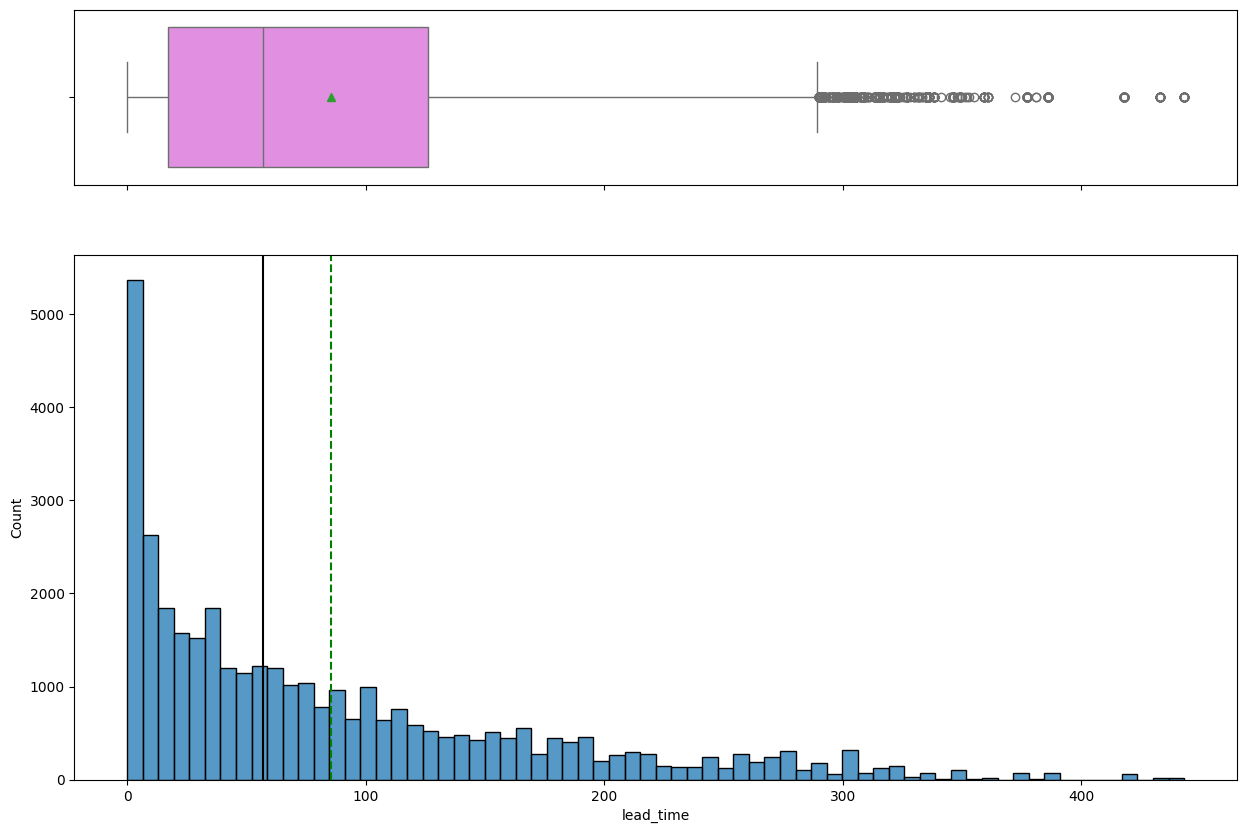

In [ ]:
histogram_boxplot(df, "lead_time")

The `lead_time` distribution is right skewed with upper outliers.

The mean lead time is about 85 days and the median is about 57 days

###Observations on average price per room

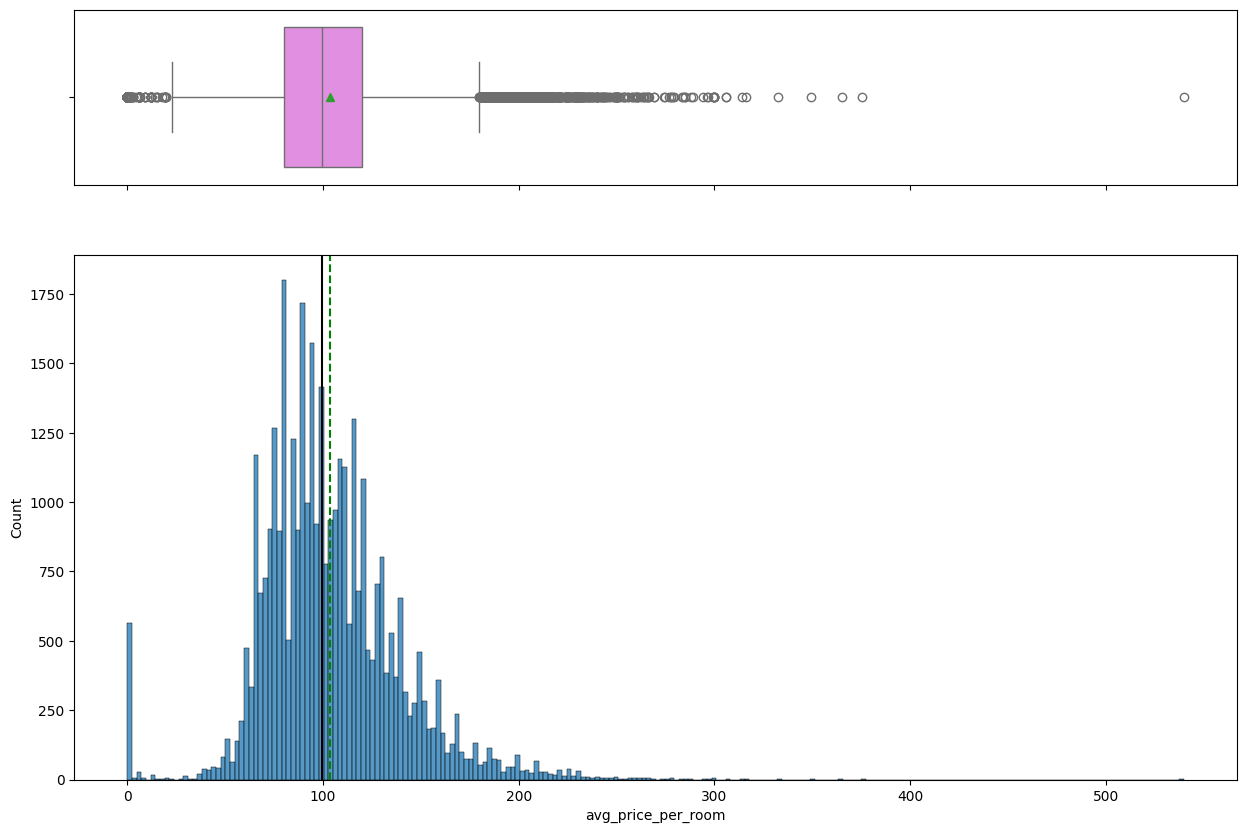

In [ ]:
histogram_boxplot(df, "avg_price_per_room")

The `average_price_per_room` distribution looks right skewed with outliers on both ends and an extreme outlier on the upper end.
The mean average price is about 103 euros and the median is about 99 euros

###Observation on number of previous cancellations

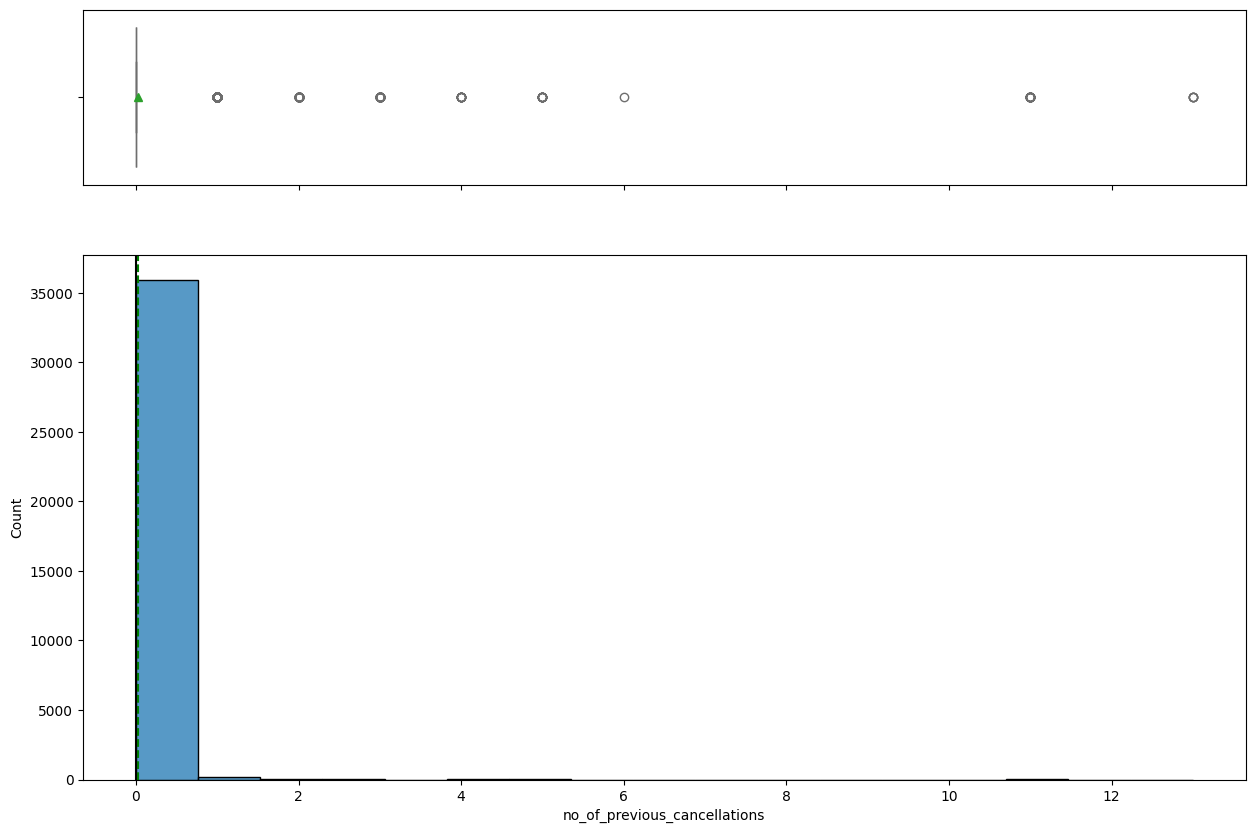

In [ ]:
histogram_boxplot(df, "no_of_previous_cancellations")

In [ ]:
df["no_of_previous_cancellations"].value_counts(normalize=True)

no_of_previous_cancellations
0    0.99068
1    0.00546
2    0.00127
3    0.00119
11   0.00069
5    0.00030
4    0.00028
13   0.00011
6    0.00003
Name: proportion, dtype: float64

Over 99% of the bookings had 0 previous cancellations

###Observations on previous bookings not cancelled

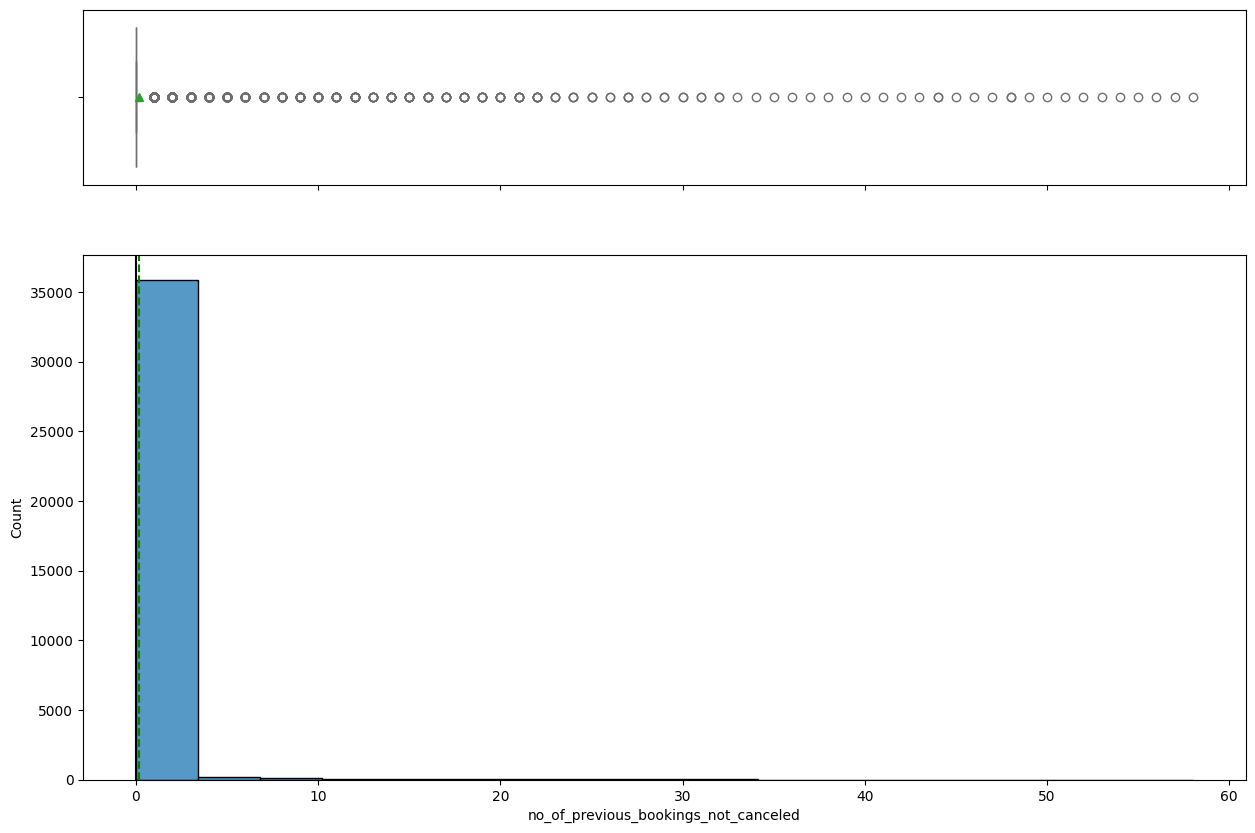

In [ ]:
histogram_boxplot(df, "no_of_previous_bookings_not_canceled")

In [ ]:
print(df["no_of_previous_bookings_not_canceled"].value_counts(normalize=True).idxmax())
print(df["no_of_previous_bookings_not_canceled"].value_counts(normalize=True).max())

0
0.9776154376292212


There are a lot of outliers and about 97.7% of bookings had 0 bookings not canceled.
(This is understandable as most of the bookings in the dataset are from first-time guests)


###Observations on number of adults

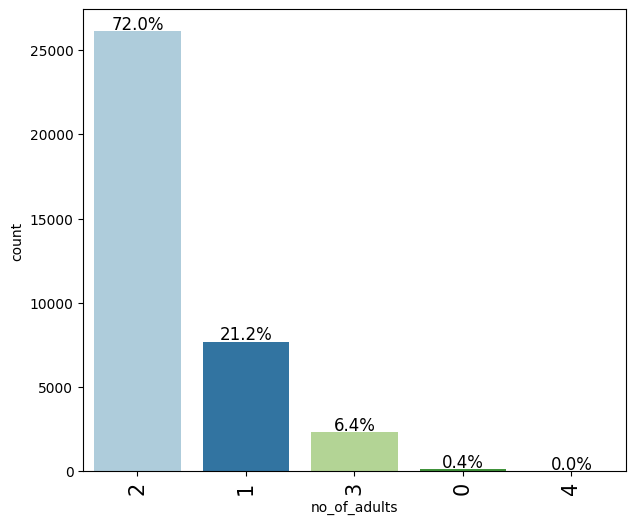

In [ ]:
labeled_barplot(df, "no_of_adults", perc=True)

72% of bookings are of two adults, 21.2% is of 1 adult

###Observations on number of children

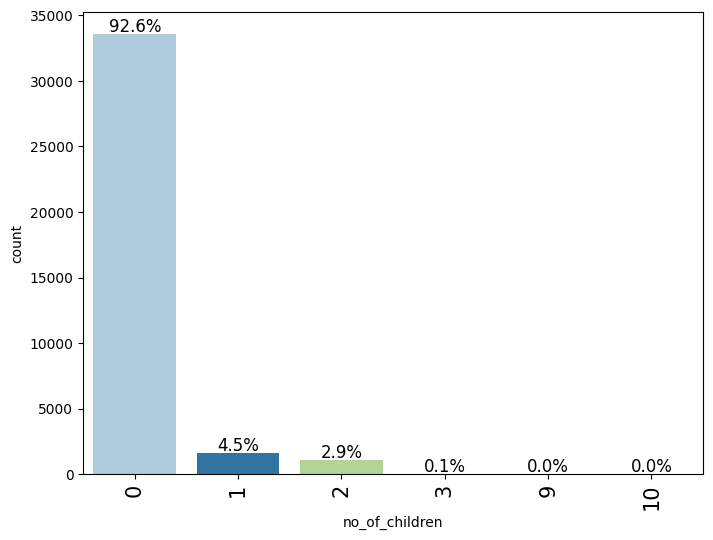

In [ ]:
labeled_barplot(df, "no_of_children", perc=True)

92.6% of bookings had 0 children

In [ ]:
df[df["no_of_children"] == 9]

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
10041   INN10042             1               9                     2   
10061   INN10062             2               9                     2   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
10041                  1       Meal Plan 1                           0   
10061                  5       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
10041        Room_Type 1         11          2017             10   
10061        Room_Type 2          8          2017              8   

       arrival_date market_segment_type  repeated_guest  \
10041            11           Corporate               0   
10061            13              Online               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
10041                             0                                     0   
10061                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
10041            95.00000                       0   Not_Canceled  
10061            76.50000                       1       Canceled

In [ ]:
df[df["no_of_children"] == 10]

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
6338   INN06339             2              10                     0   

      no_of_week_nights type_of_meal_plan  required_car_parking_space  \
6338                  2       Meal Plan 1                           0   

     room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
6338        Room_Type 4         37          2018              1            12   

     market_segment_type  repeated_guest  no_of_previous_cancellations  \
6338              Online               0                             0   

      no_of_previous_bookings_not_canceled  avg_price_per_room  \
6338                                     0            84.45000   

      no_of_special_requests booking_status  
6338                       1   Not_Canceled

**The bookings with 9 and 10 children seem to be outliers and will therefore be replaced with 3**

In [ ]:
df["no_of_children"] = df["no_of_children"].replace([9,10], 3)

###Observations on number of weekend nights

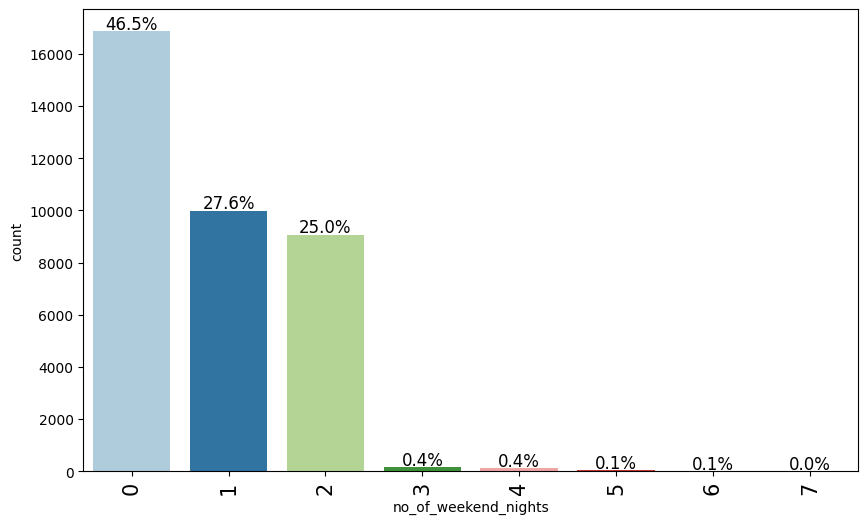

In [ ]:
labeled_barplot(df, "no_of_weekend_nights", perc=True)

46.5% of bookings spend 0 weekend nights
27.6% spend 1 and 25% spend 2 weekend nights

###Observations on number of week nights

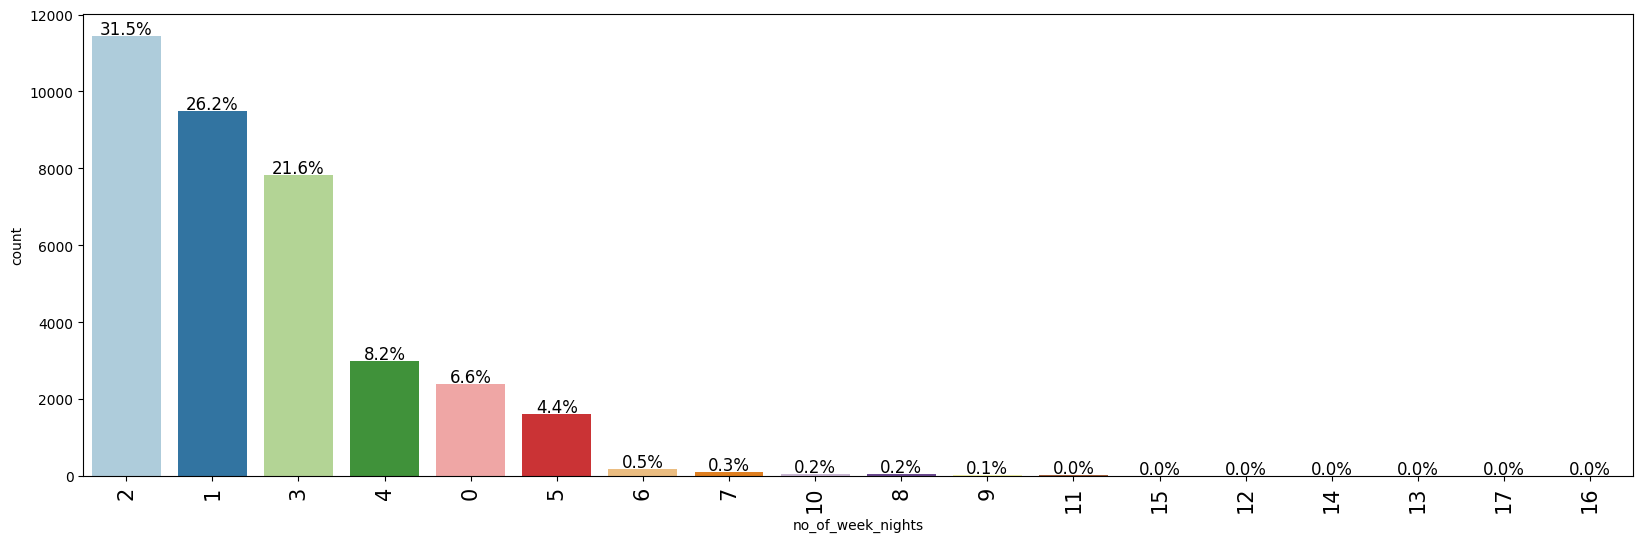

In [ ]:
labeled_barplot(df, "no_of_week_nights", perc=True)

Over 98% of the bookings spend 0-5 weeknights with 2 weeknights being the highest at 31.5%


###Obervations on type of meal plan

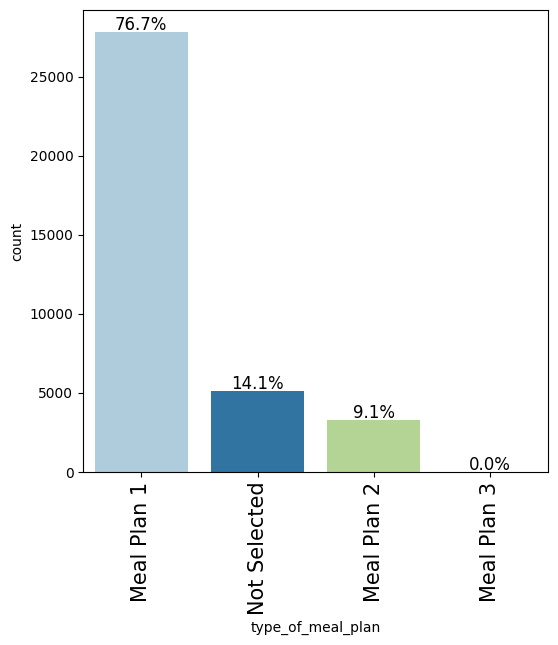

In [ ]:
labeled_barplot(df, "type_of_meal_plan", perc=True)

Meal plan 1 is the most common in the dataset at about 76.7%

###Observations on required car parking space

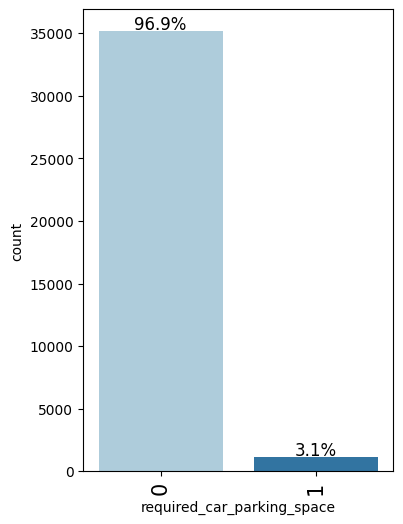

In [ ]:
labeled_barplot(df, "required_car_parking_space", perc=True)

Only 3% of the bookings required car parking space

###Observations on room type reserved

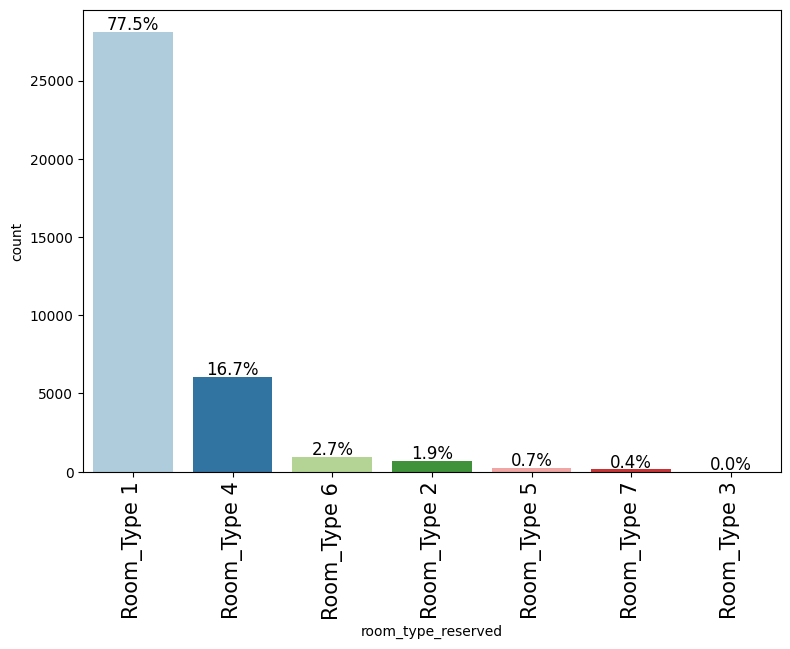

In [ ]:
labeled_barplot(df, "room_type_reserved", perc=True)

Room type 1 is the most commonly booked room at about 77.5%

###Observation on market segment type

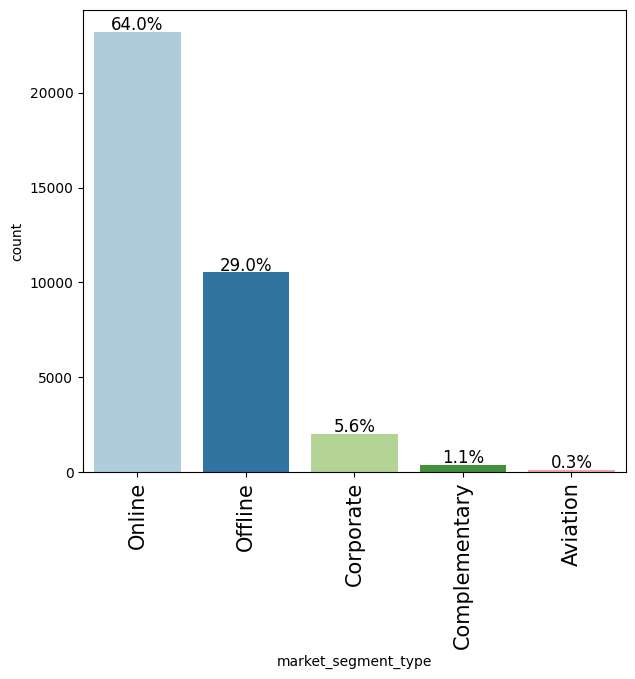

In [ ]:
labeled_barplot(df, "market_segment_type", perc=True)

Most of the guests at the hotel are from the online market segment at 64%

###Observations on arrival year

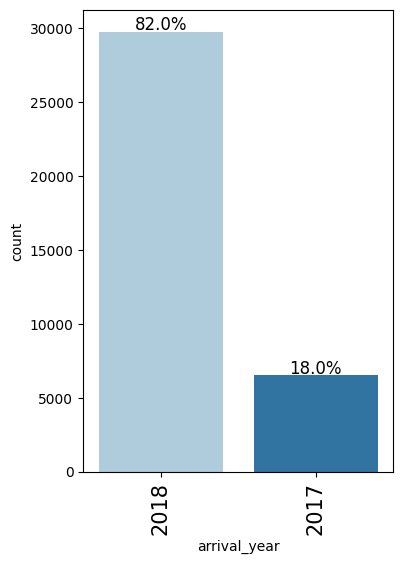

In [ ]:
labeled_barplot(df, "arrival_year", perc=True)

82% of the bookings in the dataset are for the year 2018

###Observations on arrival month

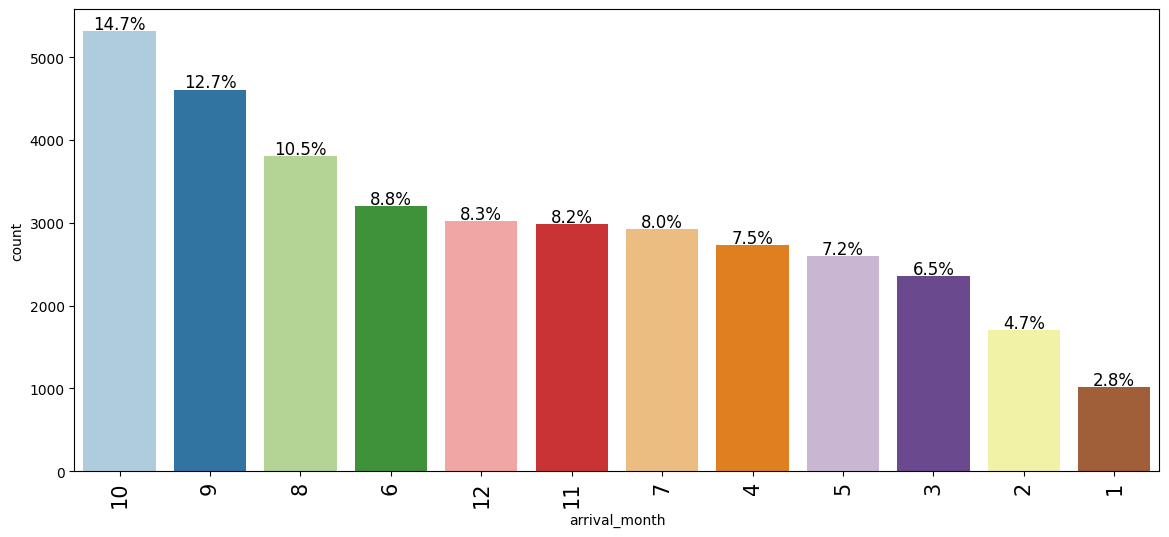

In [ ]:
labeled_barplot(df, "arrival_month", perc=True)

The 3 busiest months in the hotel are August, September and October.

October is the busiest with 14.7%

###Observations on arrival date

<Axes: xlabel='arrival_date', ylabel='Count'>

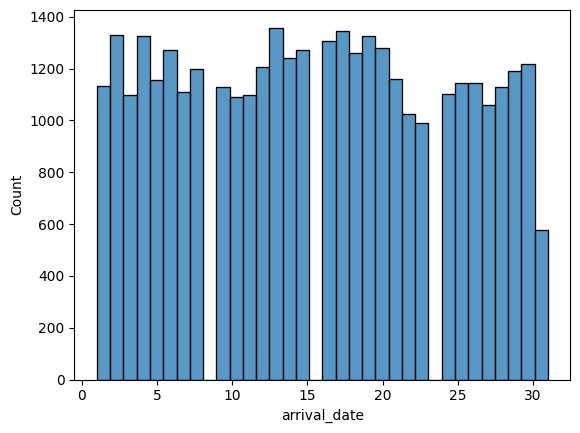

In [ ]:
sns.histplot(data=df, x="arrival_date")

The arrival date is virtually equally distributed

###Observations on repeated guest

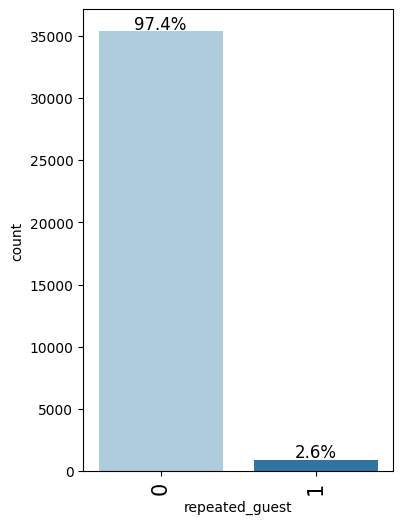

In [ ]:
labeled_barplot(df, "repeated_guest", perc=True)

Only 2.6% of the guests are repeated guests

###Observations on number of special requests

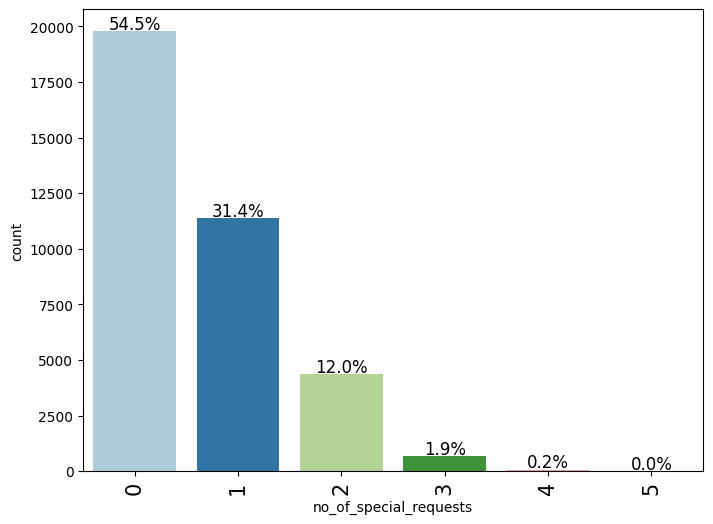

In [ ]:
labeled_barplot(df, "no_of_special_requests", perc=True)

About 54.5% of the booking required 0 special requests

31.4% had 1 special request

###Observations on booking status

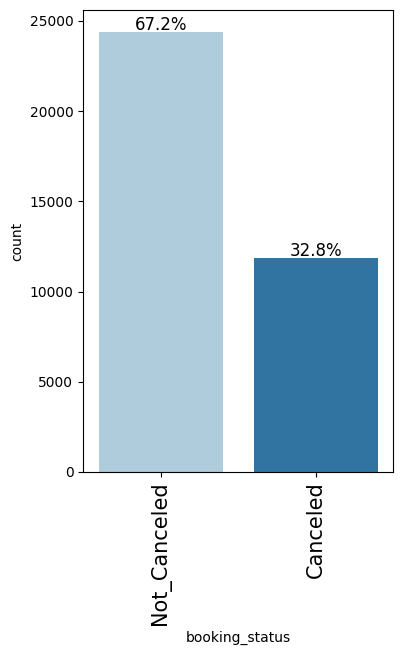

In [ ]:
labeled_barplot(df, "booking_status", perc=True)

67.2% of the bookings were not canceled

32.8% were canceled

**Encoding booking status for further analysis:**

 **Not canceled = 0, Canceled = 1**

In [ ]:
df['booking_status'] = df['booking_status'].apply(lambda x: 1 if x == "Canceled" else 0)

#Bivariate analysis

####Correlation check

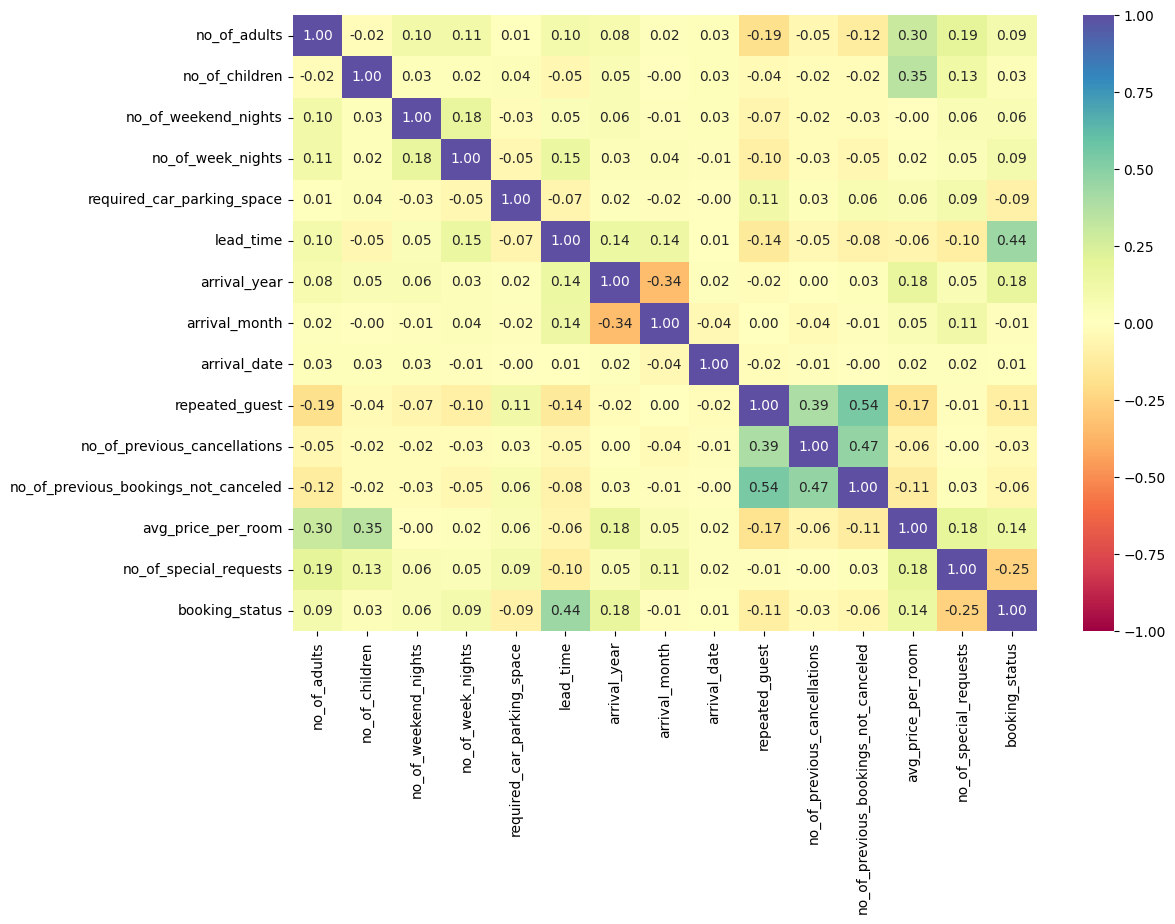

In [ ]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt = ".2f", cmap="Spectral")

plt.show()

There is low positive correlation between `lead_time `and `booking_status`

There is moderate positive correlation between `repeated_guest` and `no_of_previous_bookings_not_canceled`

There is low positive correlation between `repeated_guest` and `no_of_previous_cancellations`

There is low positive correlation between `no_of_previous_bookings_not_canceled and no_of_previous_cancellations`

There is negligible correlation between the other variables

###Booking status vs lead time

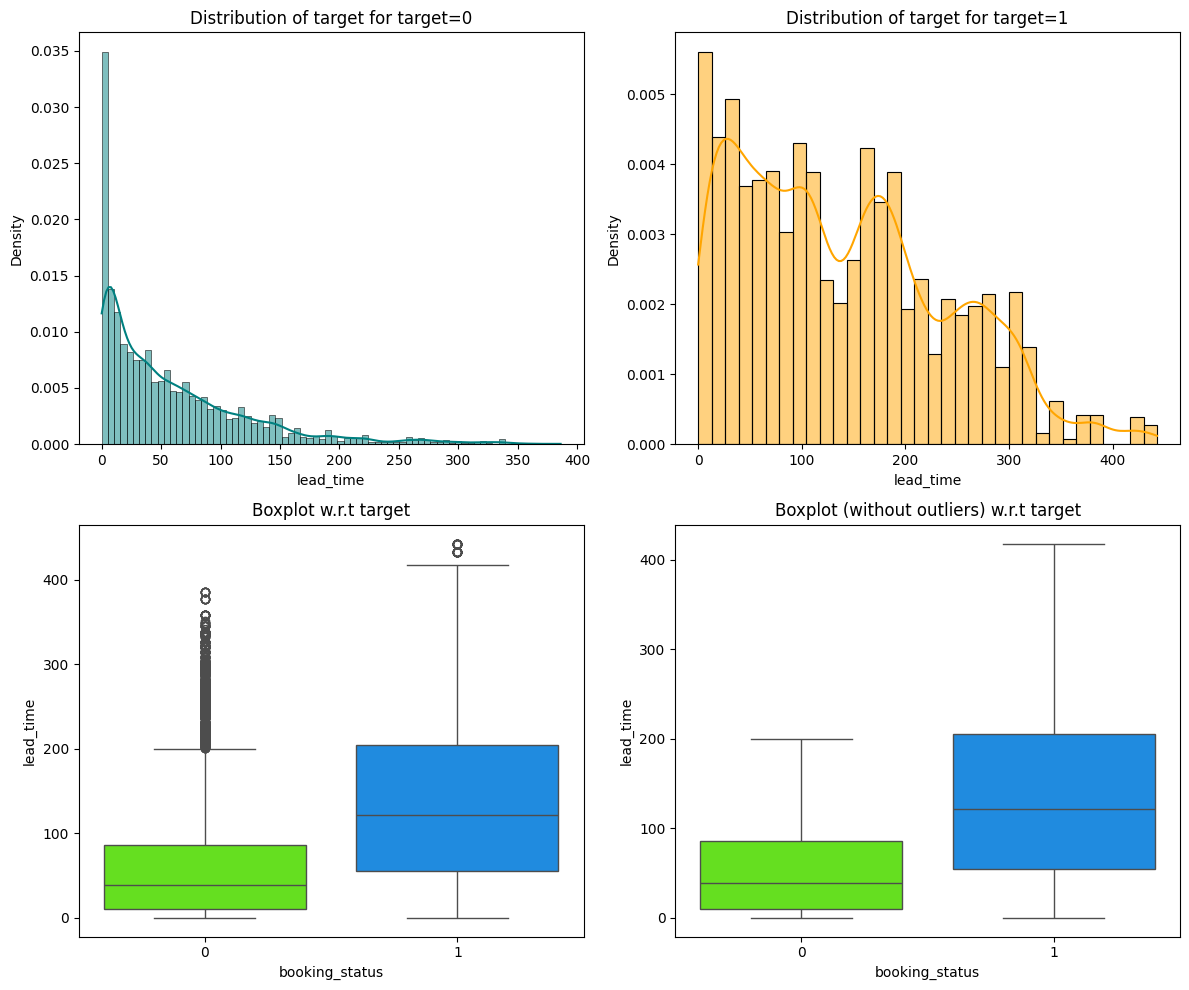

In [ ]:
distribution_plot_wrt_target(df, "lead_time", "booking_status")

On average, canceled bookings had longer lead times with a median of about 120 days

###Booking status and market segment

booking_status           0      1    All
market_segment_type                     
All                  24390  11885  36275
Online               14739   8475  23214
Offline               7375   3153  10528
Corporate             1797    220   2017
Aviation                88     37    125
Complementary          391      0    391
------------------------------------------------------------------------------------------------------------------------


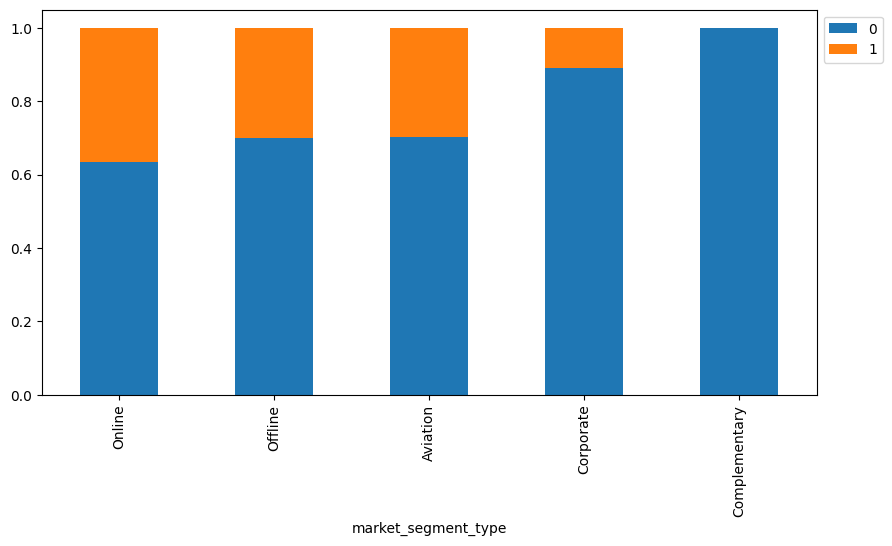

In [ ]:
stacked_barplot(df, "market_segment_type", "booking_status")

~40% of online bookings were canceled

Approximately 30% of offline and aviation bookings were canceled,

10% of corporate bookings were canceled and none of the complementary bookings were canceled

###Booking status vs repeated guest

booking_status      0      1    All
repeated_guest                     
All             24390  11885  36275
0               23476  11869  35345
1                 914     16    930
------------------------------------------------------------------------------------------------------------------------


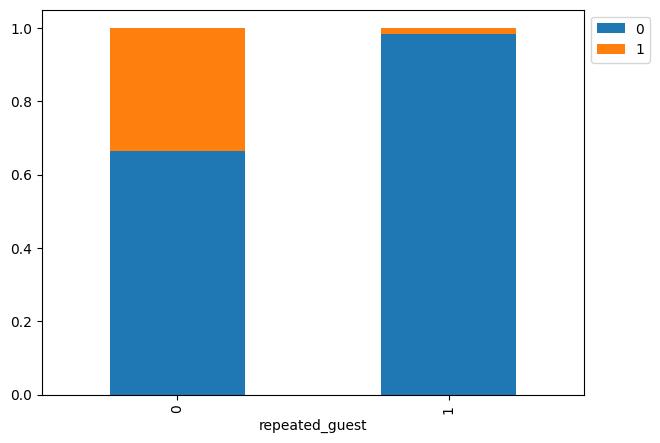

In [ ]:
stacked_barplot(df, "repeated_guest", "booking_status")

Approximately 1.7% of repeated guests canceled their bookings and about 33% of first time guests canceled their bookings

###Booking status vs average price per room

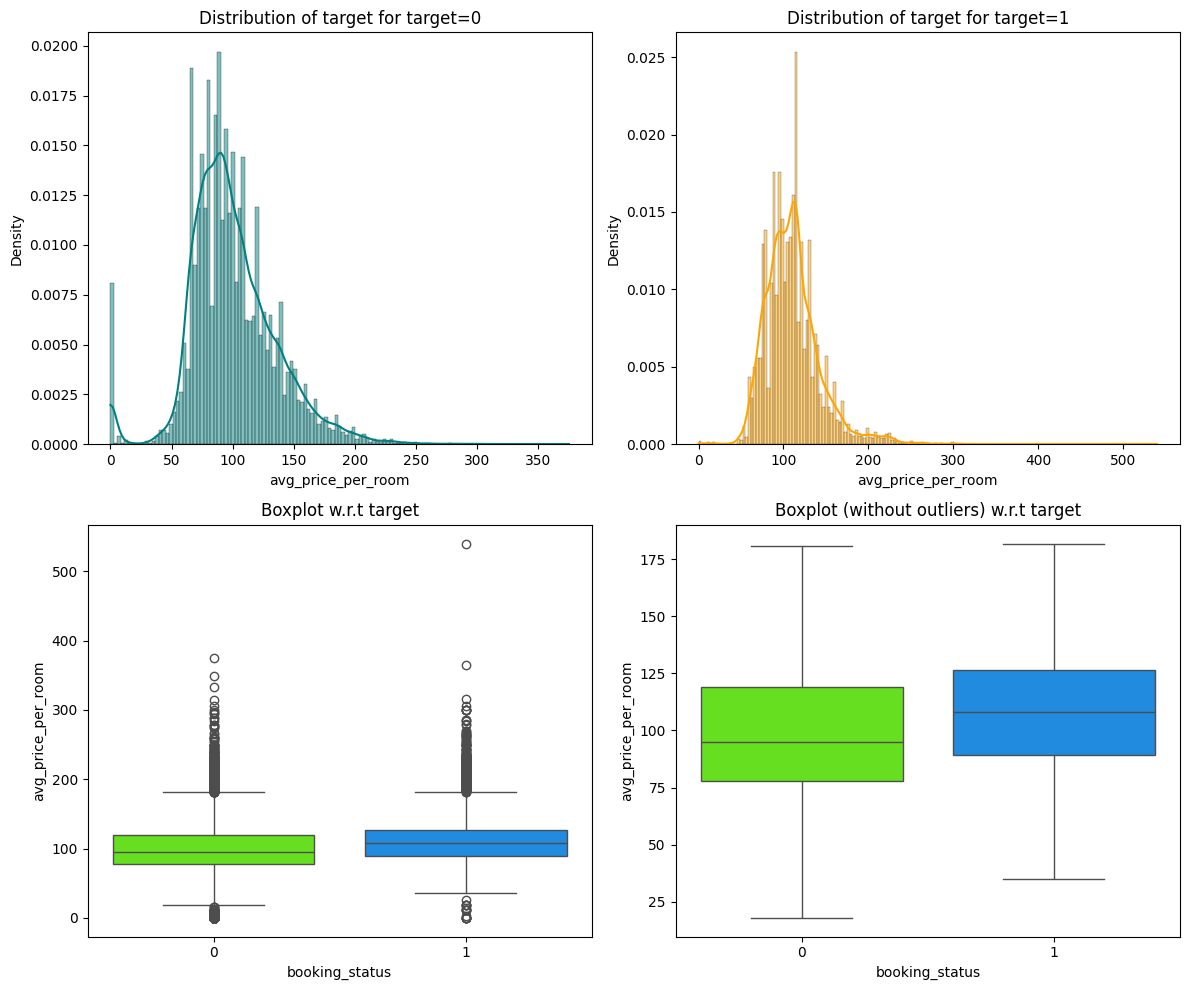

In [ ]:
distribution_plot_wrt_target(df, "avg_price_per_room", "booking_status")

On average, canceled bookings have a higher average price per room at about 110 euros

###Booking status vs number of special requests

booking_status              0      1    All
no_of_special_requests                     
All                     24390  11885  36275
0                       11232   8545  19777
1                        8670   2703  11373
2                        3727    637   4364
3                         675      0    675
4                          78      0     78
5                           8      0      8
------------------------------------------------------------------------------------------------------------------------


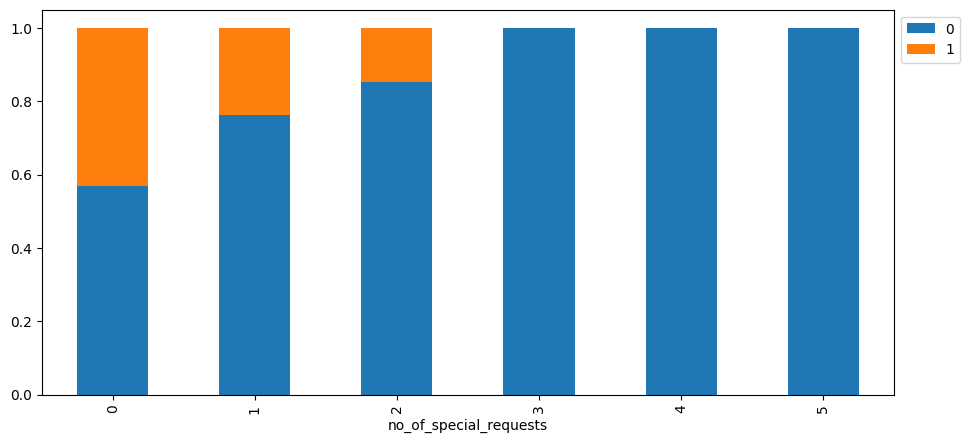

In [ ]:
stacked_barplot(df, "no_of_special_requests", "booking_status")

Bookings with 3 - 5 special requests had no cancellations. About 40% of bookings with 0 special requests were canceled
~20% of bookings with 1 special request were canceled and
~15% of bookings with 2 special requests were canceled.

It seems the higher the number of special requests the less likely a booking gets canceled

###Booking status vs type of meal plan

booking_status         0      1    All
type_of_meal_plan                     
All                24390  11885  36275
Meal Plan 1        19156   8679  27835
Not Selected        3431   1699   5130
Meal Plan 2         1799   1506   3305
Meal Plan 3            4      1      5
------------------------------------------------------------------------------------------------------------------------


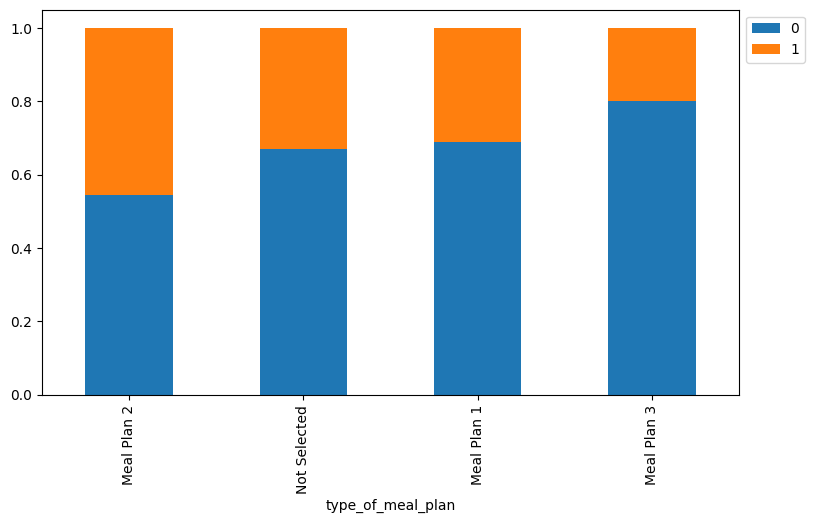

In [ ]:
stacked_barplot(df, "type_of_meal_plan", "booking_status")

About 50% of bookings made with meal plan 2 (Half board) were canceled

Bookings made with meal plan 3 (Full board) have the least proportion of cancellations at about 20%

###Booking status vs room type reserved

booking_status          0      1    All
room_type_reserved                     
All                 24390  11885  36275
Room_Type 1         19058   9072  28130
Room_Type 4          3988   2069   6057
Room_Type 6           560    406    966
Room_Type 2           464    228    692
Room_Type 5           193     72    265
Room_Type 7           122     36    158
Room_Type 3             5      2      7
------------------------------------------------------------------------------------------------------------------------


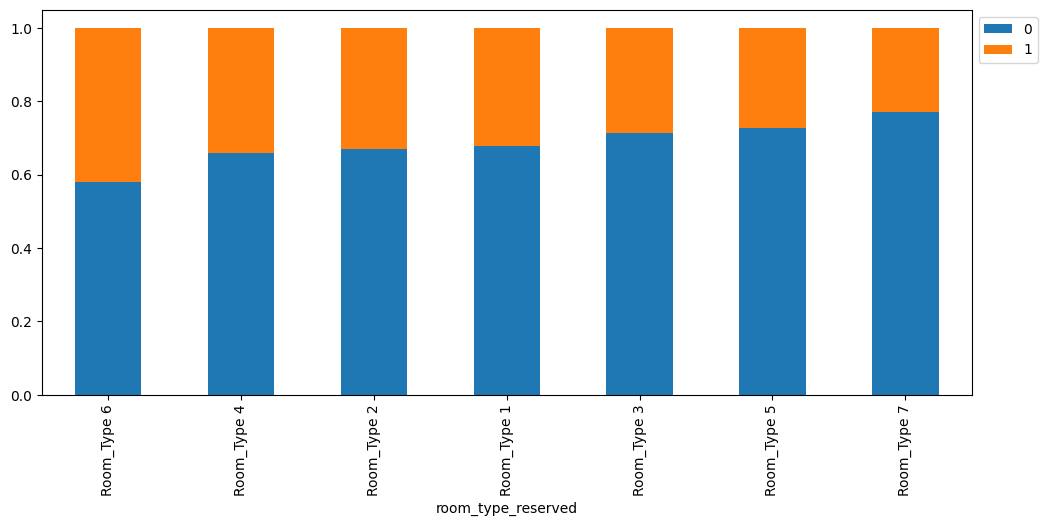

In [ ]:
stacked_barplot(df, "room_type_reserved", "booking_status")

Approximately 40% of room type 6 were canceled and about 30% of room type 7 bookings were cancelled.

 30-40% of bookings of each room type were canceled

###Booking status vs number of adults

booking_status      0      1    All
no_of_adults                       
All             24390  11885  36275
2               16989   9119  26108
1                5839   1856   7695
3                1454    863   2317
0                  95     44    139
4                  13      3     16
------------------------------------------------------------------------------------------------------------------------


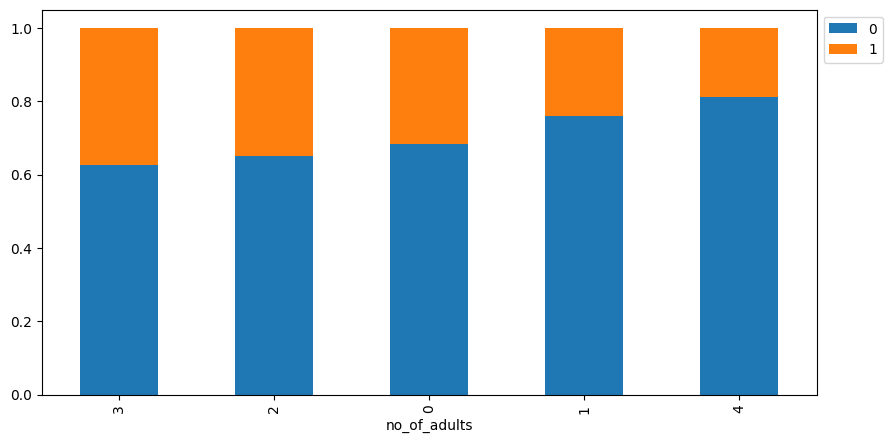

In [ ]:
stacked_barplot(df, "no_of_adults", "booking_status")

About 40% of bookings with 2 and 3 adults were canceled

###Booking status vs number of children

booking_status      0      1    All
no_of_children                     
All             24390  11885  36275
0               22695  10882  33577
1                1078    540   1618
2                 601    457   1058
3                  16      6     22
------------------------------------------------------------------------------------------------------------------------


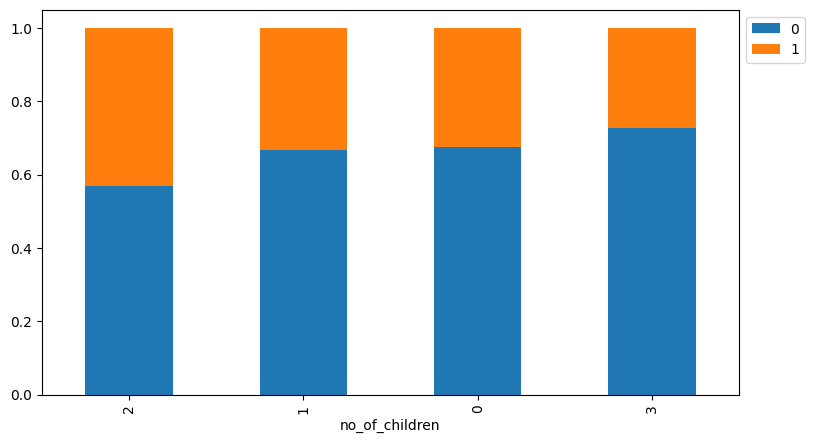

In [ ]:
stacked_barplot(df, "no_of_children", "booking_status")

~40% of bookings with 2 children were canceled and about 30% of bookings with 0, 1 & 3 children were canceled

###Booking status vs number of weekend nights

booking_status            0      1    All
no_of_weekend_nights                     
All                   24390  11885  36275
0                     11779   5093  16872
1                      6563   3432   9995
2                      5914   3157   9071
4                        46     83    129
3                        79     74    153
5                         5     29     34
6                         4     16     20
7                         0      1      1
------------------------------------------------------------------------------------------------------------------------


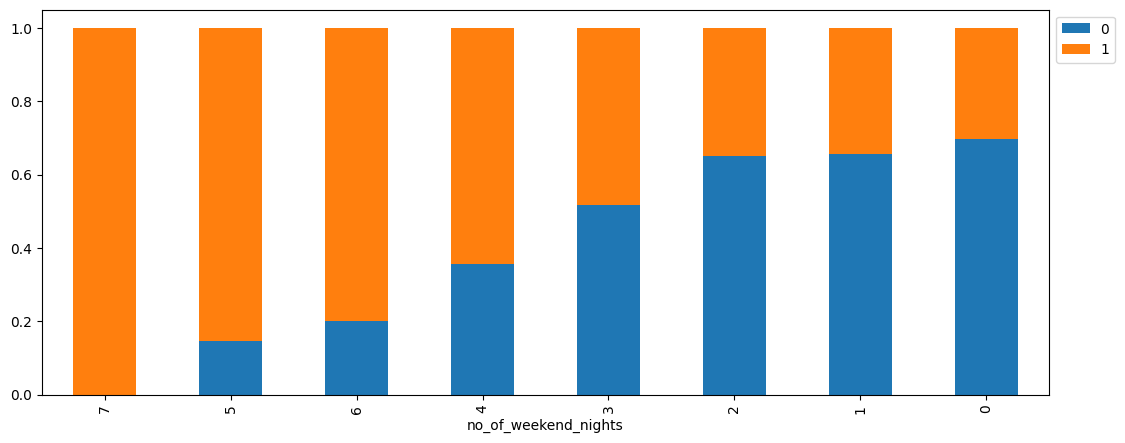

In [ ]:
stacked_barplot(df, "no_of_weekend_nights", "booking_status")

About 40% of bookings with 0-2 weekend nights were canceled. It seems the greater the number of weekend nights, the higher the percentage of canceled bookings

###Booking status vs number of week nights

booking_status         0      1    All
no_of_week_nights                     
All                24390  11885  36275
2                   7447   3997  11444
3                   5265   2574   7839
1                   6916   2572   9488
4                   1847   1143   2990
0                   1708    679   2387
5                    982    632   1614
6                    101     88    189
10                     9     53     62
7                     61     52    113
8                     30     32     62
9                     13     21     34
11                     3     14     17
15                     2      8     10
12                     2      7      9
13                     0      5      5
14                     3      4      7
16                     0      2      2
17                     1      2      3
------------------------------------------------------------------------------------------------------------------------


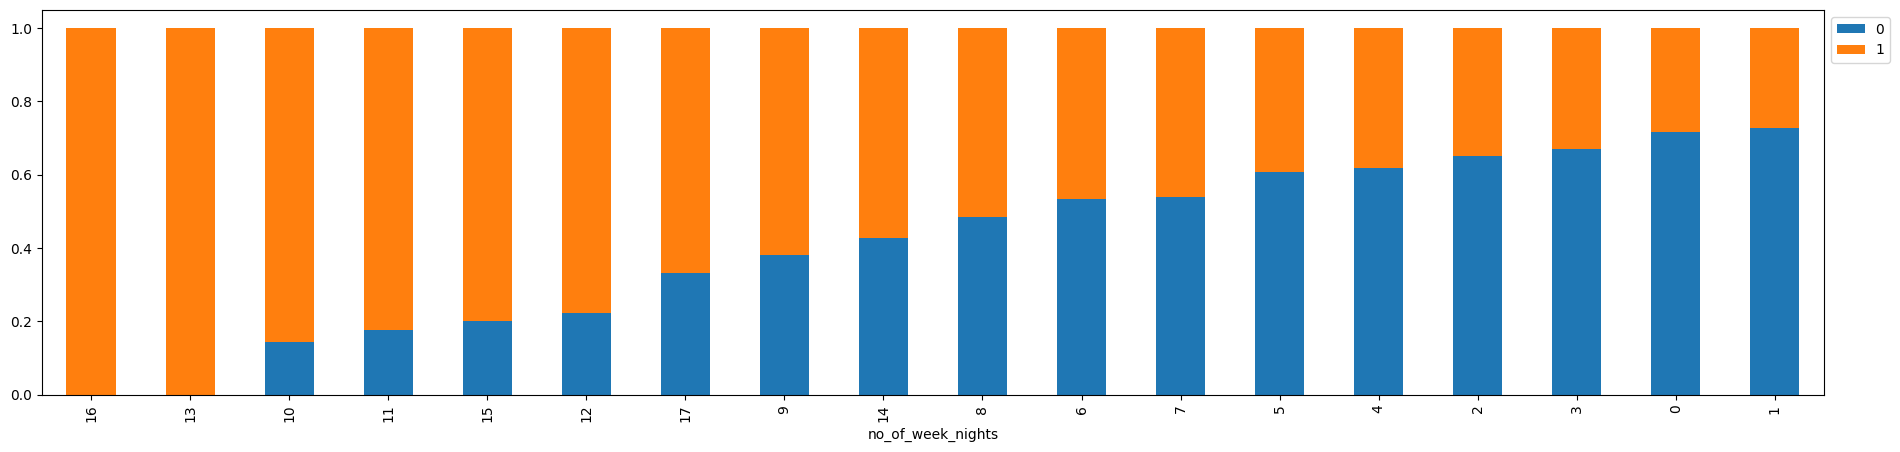

In [ ]:
stacked_barplot(df, "no_of_week_nights", "booking_status")

The same trend is seen here, it seems the greater the number of weeknights, the higher the percentage of canceled bookings

###Booking status vs required car parking space

booking_status                  0      1    All
required_car_parking_space                     
All                         24390  11885  36275
0                           23380  11771  35151
1                            1010    114   1124
------------------------------------------------------------------------------------------------------------------------


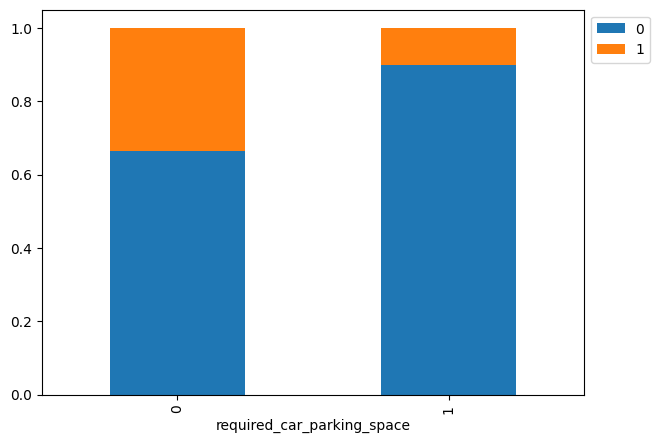

In [ ]:
stacked_barplot(df, "required_car_parking_space", "booking_status")

About 10% of bookings that required car parking space were canceled and about 35% of bookings that did not required parking space  were canceled

###Booking status and arrival month

booking_status      0      1    All
arrival_month                      
All             24390  11885  36275
10               3437   1880   5317
9                3073   1538   4611
8                2325   1488   3813
7                1606   1314   2920
6                1912   1291   3203
4                1741    995   2736
5                1650    948   2598
11               2105    875   2980
3                1658    700   2358
2                1274    430   1704
12               2619    402   3021
1                 990     24   1014
------------------------------------------------------------------------------------------------------------------------


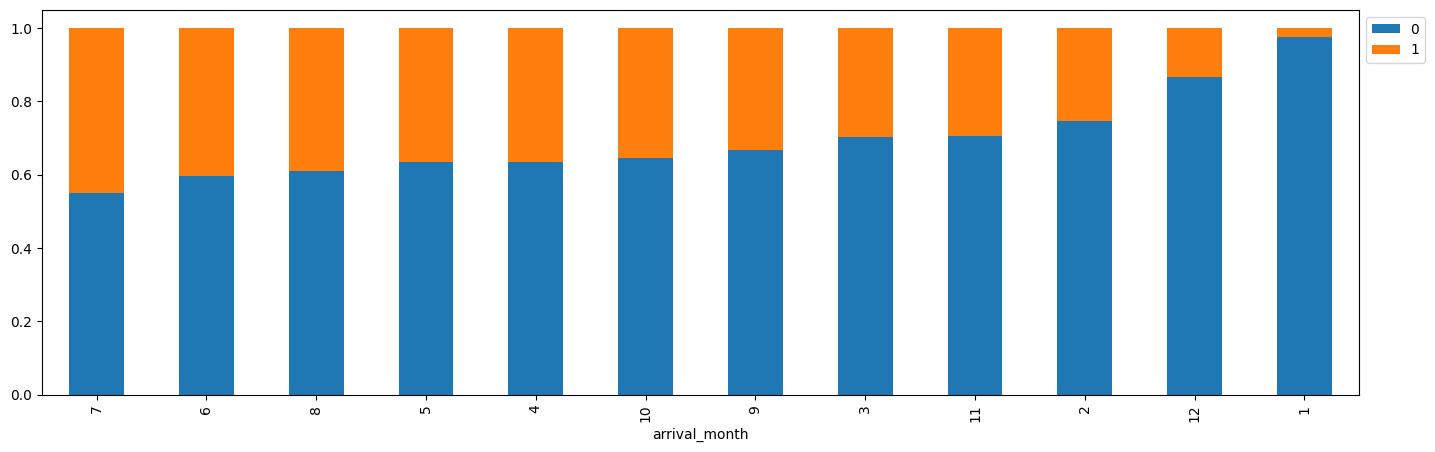

In [ ]:
stacked_barplot(df, "arrival_month", "booking_status")

The hotel experienced the highest proportion of cancellations in July at about 42%

The busiest months: August, September and October had about 40% of bookings canceled

###Average price vs market segment

<Axes: xlabel='market_segment_type', ylabel='avg_price_per_room'>

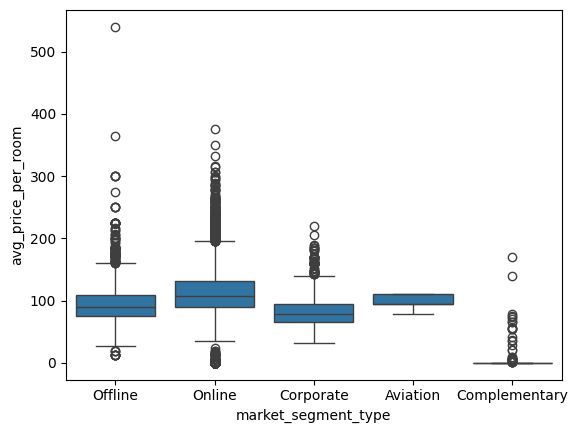

In [ ]:
sns.boxplot(data=df, x= "market_segment_type", y="avg_price_per_room")

On average, online bookings are priced higher than the other market segments

And as seen earlier, online bookings had the highest proportion of cancellations

###Average price per room vs special requests

<Axes: xlabel='no_of_special_requests', ylabel='avg_price_per_room'>

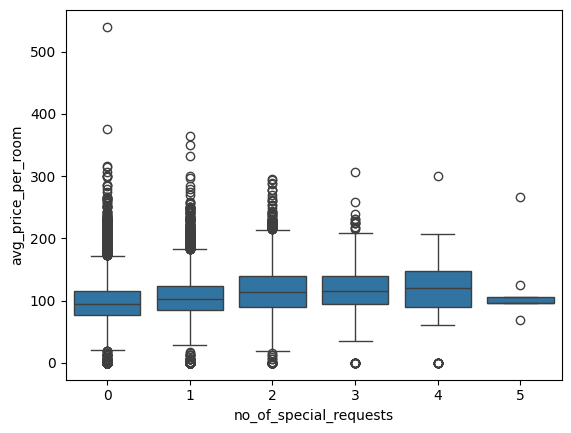

In [ ]:
sns.boxplot(data=df, x= "no_of_special_requests", y="avg_price_per_room")

On average, the higher the number of special requests, the higher the average price per room

###Average price per room vs month

<Axes: xlabel='arrival_month', ylabel='avg_price_per_room'>

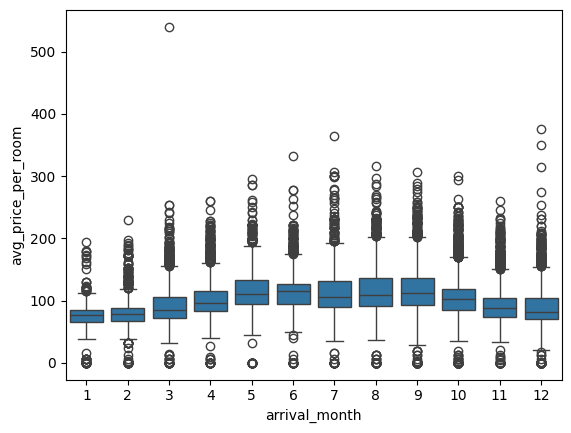

In [ ]:
sns.boxplot(data=df, x="arrival_month", y="avg_price_per_room")

On average, the months of May to September have the highest average price per room

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

###Feature Engineering

**Dropping the Booking ID column as the IDs are unique identifiers.**


In [ ]:
df.drop(["Booking_ID"], axis=1, inplace=True)

In [ ]:
df.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2018              4            11              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests  booking_status  
0                       0               0  
1                       1               0  
2                       0               1  
3                       0               1  
4                       0               1

###Outlier detection and treatment

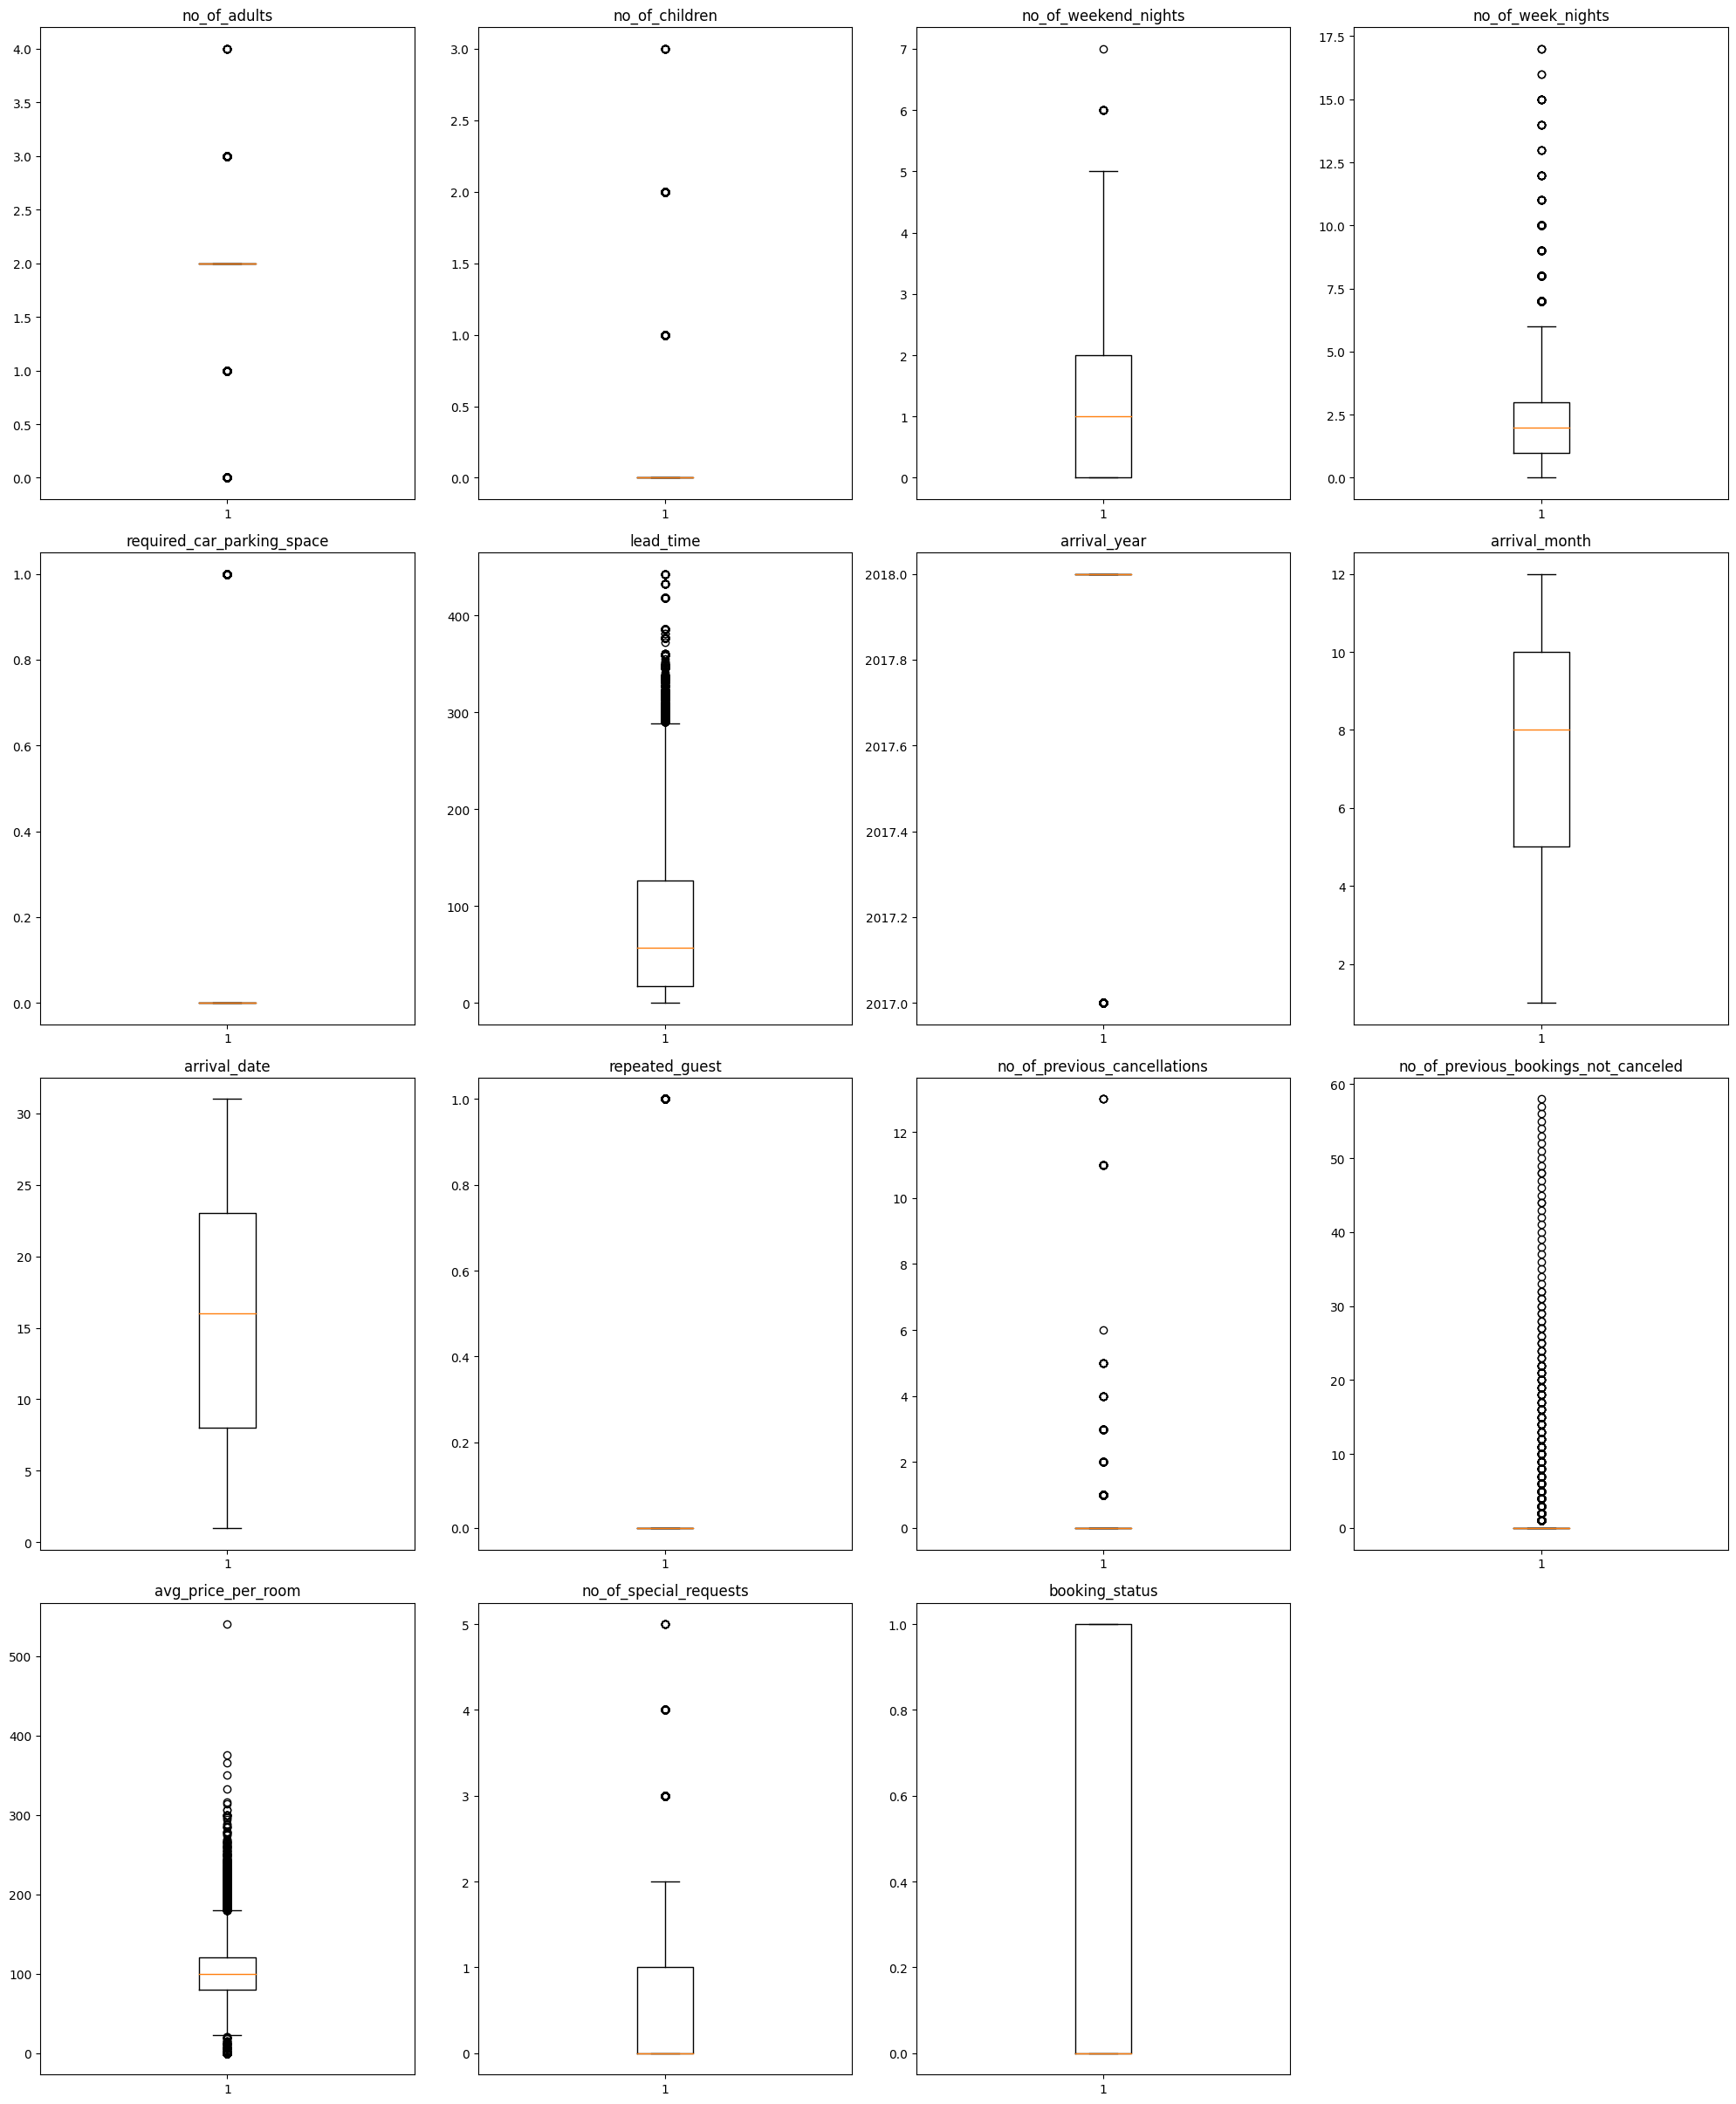

In [ ]:
#Plots of the numerical variables
num_cols = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(num_cols):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Treating the extreme outliers on average price per room only so the model wouldnt be too affected. The rest of the outliers would be left alone as these values are real values**

In [ ]:
Q1 = df["avg_price_per_room"].quantile(0.25)  #25th quantile
Q3 = df["avg_price_per_room"].quantile(0.75)  #75th quantile

IQR = Q3 - Q1

Lower_Whisker = Q1 - 1.5 * IQR
Upper_Whisker = Q3 + 1.5 * IQR

Upper_Whisker

179.55

In [ ]:
#Replacing the extreme outlier with the upper whisker value
df.loc[df["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

## EDA

- It is a good idea to explore the data once again after manipulating it.

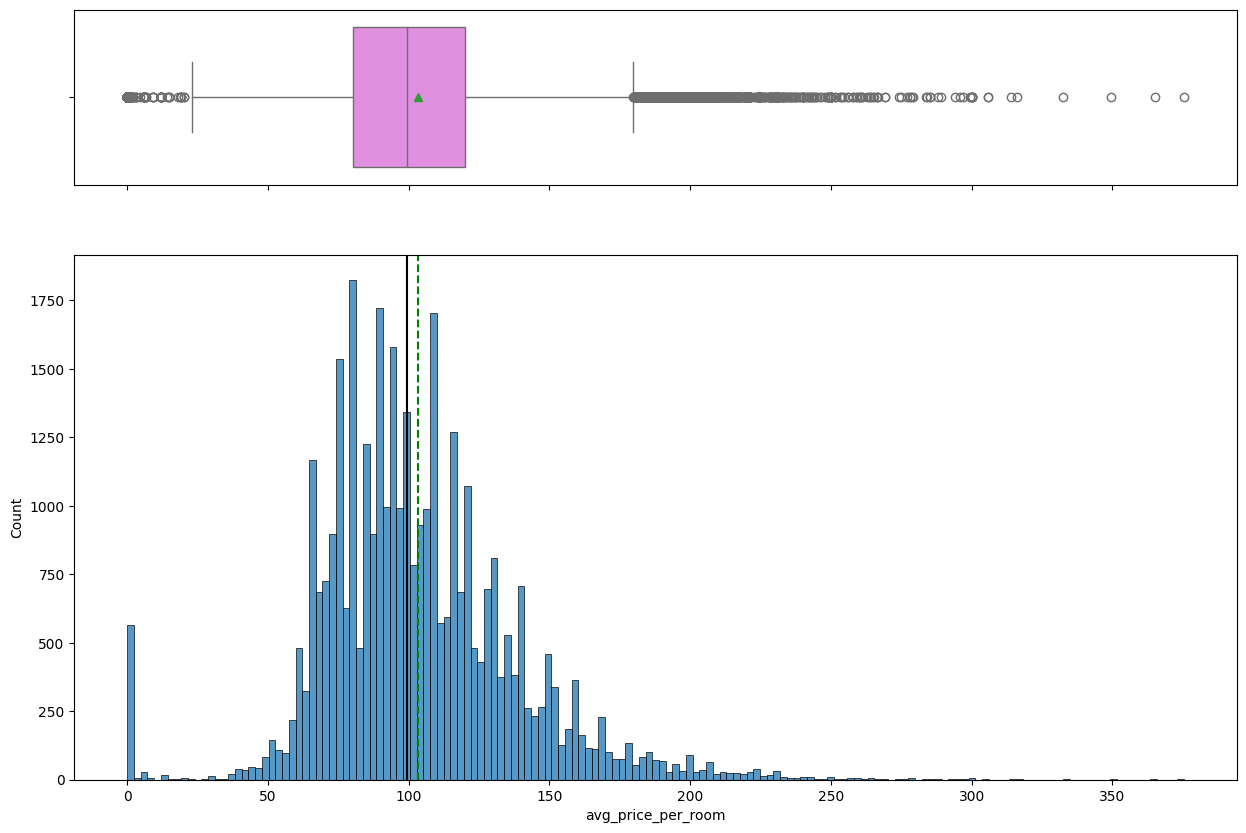

In [ ]:
histogram_boxplot(df, "avg_price_per_room")

###Preparing data for modeling

**Creating training and test sets**

In [ ]:
#specifying the independent and dependent variables

X = df.drop(["booking_status"], axis=1)
Y = df["booking_status"]

# adding a constant to the independent variables
X = sm.add_constant(X)

#creating dummies for categorical variables
X = pd.get_dummies(X, drop_first=True)

#splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

In [ ]:
#setting the independent variables as floats
X_train = X_train.astype('float')
X_test = X_test.astype('float')

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 28)
Shape of test set :  (10883, 28)
Percentage of classes in training set:
booking_status
0   0.67064
1   0.32936
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
0   0.67638
1   0.32362
Name: proportion, dtype: float64


As seen earlier about 67% of observatiions belonged to class 0 (Not canceled) and 32% of observations belonged to class 1 (Canceled) and this has been preserved in the train and test sets

## Building a Logistic Regression model

In [ ]:
logit = sm.Logit(y_train, X_train)

lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Fri, 19 Apr 2024   Pseudo R-squ.:                  0.3292
Time:                        22:25:50   Log-Likelihood:                -10794.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -922.8266    120.832     -7.637      0.000   -1159.653    -686.000
no_of_adults                             0.1137      

OBSERVATIONS:

The positive coefficients indicate that the probabilty of a booking getting canceled increases with an increase of the corresponding attribute value.

The negative coefficients indicate that the probabilty of a booking getting canceled decreases with an increase of the corresponding attribute value.

At a significance level of 0.05, p-values less than 0.05 are considered significant

## Model performance evaluation

POSSIBLE WRONG PREDICTIONS:
Predicting a booking is canceled and in reality it is not

Predicting a booking is not canceled and in reality it is canceled

**Both cases are important because:**

if the model predicts a booking is canceled and it is not, then the hotel will deal with irate guests and will have to make last minute arrangements or compensations

if the model predicts a booking does not get canceled and it does, then there will be loss of revenue for the hotel.

To reduce both False positives and False negatives, the metric of importance is the **F1 score**

###Functions for calculating metrics and creating confusion matrix

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

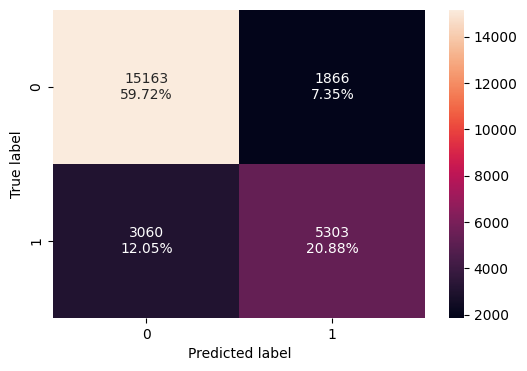

In [ ]:
confusion_matrix_statsmodels(lg, X_train, y_train)

In [ ]:
model_performance_classification_statsmodels(lg, X_train, y_train)

Accuracy  Recall  Precision      F1
0   0.80600 0.63410    0.73971 0.68285

OBSERVATIONS:
The f1 score is about 0.68, there are variables with high p-values so there might be multicollinearity.

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [ ]:
#function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
checking_vif(X_train)

feature            VIF
0                                  const 39497686.20788
1                           no_of_adults        1.35113
2                         no_of_children        2.09358
3                   no_of_weekend_nights        1.06948
4                      no_of_week_nights        1.09571
5             required_car_parking_space        1.03997
6                              lead_time        1.39517
7                           arrival_year        1.43190
8                          arrival_month        1.27633
9                           arrival_date        1.00679
10                        repeated_guest        1.78358
11          no_of_previous_cancellations        1.39569
12  no_of_previous_bookings_not_canceled        1.65200
13                    avg_price_per_room        2.06860
14                no_of_special_requests        1.24798
15         type_of_meal_plan_Meal Plan 2        1.27328
16         type_of_meal_plan_Meal Plan 3        1.02526
17        type_of_meal_plan_Not Selected        1.27306
18        room_type_reserved_Room_Type 2        1.10595
19        room_type_reserved_Room_Type 3        1.00330
20        room_type_reserved_Room_Type 4        1.36361
21        room_type_reserved_Room_Type 5        1.02800
22        room_type_reserved_Room_Type 6        2.05614
23        room_type_reserved_Room_Type 7        1.11816
24     market_segment_type_Complementary        4.50276
25         market_segment_type_Corporate       16.92829
26           market_segment_type_Offline       64.11564
27            market_segment_type_Online       71.18026

The variables `market_segment_type_Corporate`, `market_segment_type_Offline`, `market_segment_type_Online` have especially high VIFs

###Treating high p-values

In [ ]:
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [ ]:
#replacing the train and test sets with selected features
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

In [ ]:
#Building a new model with the selected feature
logit1 = sm.Logit(y_train, X_train1)

lg1 = logit1.fit(disp=False)
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Fri, 19 Apr 2024   Pseudo R-squ.:                  0.3282
Time:                        22:26:30   Log-Likelihood:                -10810.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -915.6391    120.471     -7.600      0.000   -1151.758    -679.520
no_of_adults                       0.1088      0.037      2.914      0.

In [ ]:
checking_vif(X_train1)

feature            VIF
0                            const 39218273.29399
1                     no_of_adults        1.33376
2                   no_of_children        2.09045
3             no_of_weekend_nights        1.06046
4                no_of_week_nights        1.08995
5       required_car_parking_space        1.03924
6                        lead_time        1.37608
7                     arrival_year        1.42206
8                    arrival_month        1.26749
9                   repeated_guest        1.53163
10    no_of_previous_cancellations        1.20391
11              avg_price_per_room        1.73542
12          no_of_special_requests        1.23850
13   type_of_meal_plan_Meal Plan 2        1.25881
14  type_of_meal_plan_Not Selected        1.25225
15  room_type_reserved_Room_Type 2        1.10538
16  room_type_reserved_Room_Type 4        1.34655
17  room_type_reserved_Room_Type 5        1.01769
18  room_type_reserved_Room_Type 6        2.02666
19  room_type_reserved_Room_Type 7        1.06102
20   market_segment_type_Corporate        1.45378
21     market_segment_type_Offline        1.55794

Multicolinearity has been treated

##Coefficient interpretation

In [ ]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns).T

const  no_of_adults  no_of_children  no_of_weekend_nights  \
Odds           0.00000       1.11491         1.16546               1.11470   
Change_odd% -100.00000      11.49096        16.54593              11.46966   

             no_of_week_nights  required_car_parking_space  lead_time  \
Odds                   1.04258                     0.20296    1.01583   
Change_odd%            4.25841                   -79.70395    1.58331   

             arrival_year  arrival_month  repeated_guest  \
Odds              1.57195        0.95839         0.06478   
Change_odd%      57.19508       -4.16120       -93.52180   

             no_of_previous_cancellations  avg_price_per_room  \
Odds                              1.25712             1.01937   
Change_odd%                      25.71181             1.93684   

             no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
Odds                        0.22996                        1.17846   
Change_odd%               -77.00374                       17.84641   

             type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
Odds                                1.33109                         0.70104   
Change_odd%                        33.10947                       -29.89588   

             room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
Odds                                0.75364                         0.47885   
Change_odd%                       -24.63551                       -52.11548   

             room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
Odds                                0.37977                         0.23827   
Change_odd%                       -62.02290                       -76.17294   

             market_segment_type_Corporate  market_segment_type_Offline  
Odds                               0.45326                      0.16773  
Change_odd%                      -54.67373                    -83.22724

`no_of_adults`: Holding all features constant, 1 unit change in the number of adults will increase the odds of a booking being canceled by ~11.5%.

`no_of_children`: Holding all features constant, 1 unit change in the number of children will increase the odds of a booking being canceled by ~16.5%.

`no_of_weekend_nights`: Holding all features constant, 1 unit change in the number of weekend nights will increase the odds of a booking being canceled by ~11.5%.

`no_of_week_nights`: Holding all features constant, 1 unit change in the number of week nights will increase the odds of a booking being canceled by ~4%.

`required_car_parking_space`: Holding all features constant, the odds of a booking being canceled if a guest requires parking space decreases by ~80%

`lead_time`: Holding all features constant, 1 unit change in the lead time will increase the odds of a booking being canceled by ~2%.

`repeated_guest`: Holding all features constant, the odds of a booking being canceled if a guest is a repeated guest decreases by ~94%

`no_of_previous_cancellations`: Holding all features constant, 1 unit change in the number of previous cancellations will increase the odds of a booking being canceled by ~26%

`avg_price_per_room`: Holding all features constant, 1 unit change in the average price per room will increase the odds of a booking being canceled by ~2%

`no_of_special_requests`: Holding all features constant, 1 unit change in the number of special requests will decrease the odds of a booking being canceled by ~77%

`meal_plan`:
  
*   The odds of booking being canceled if the meal plan is Meal Plan 2 is ~17% more than Meal plan 1 or Meal Plan 3 was selected.
*    Also, the odds of a booking without a selected meal plan being canceled is ~33% more than if Meal Plan 1 or Meal Plan 3 was selected


`room_type_reserved`:  

*   The odds of a booking being canceled if room type 2 is reserved is ~30% less than if room type 1 or 3 was reserved.

*   The odds of a booking being canceled if room type 4 is reserved is ~25% less than if room type 1 or 3 was reserved.

*   The odds of a booking being canceled if room type 5 is reserved is ~52% less than if room type 1 or 3 was reserved.

*   The odds of a booking being canceled if room type 6 is reserved is ~62% less than if room type 1 or 3 was reserved.
*    The odds of a booking being canceled if room type 7 is reserved is ~76% less than if room type 1 or 3 was reserved.

`market_segment_type`:

*   The odds of a booking from the corporate market segment being canceled is ~55% less than the online, aviation and complementary market segments
*   The odds of a booking from the offline market segment being canceled is ~83% less than the online, aviation and complementary market segments



   


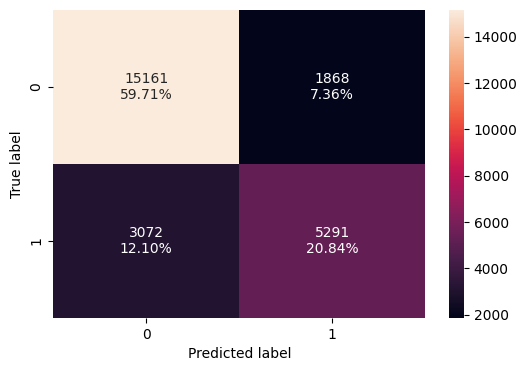

In [ ]:
confusion_matrix_statsmodels(lg1, X_train1, y_train)

In [ ]:
log_reg_model_train_perf = model_performance_classification_statsmodels(lg1, X_train1, y_train)
log_reg_model_train_perf

Accuracy  Recall  Precision      F1
0   0.80545 0.63267    0.73907 0.68174

####Test set performance of the new model

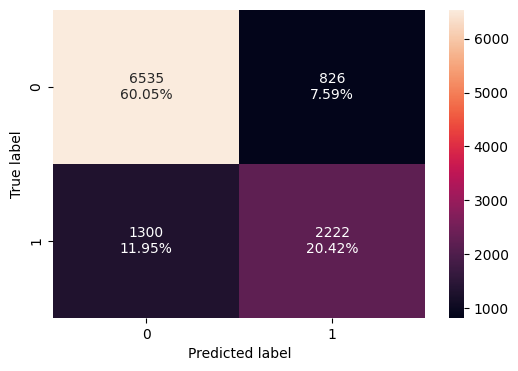

In [ ]:
confusion_matrix_statsmodels(lg1, X_test1, y_test)

In [ ]:
log_reg_model_test_perf = model_performance_classification_statsmodels(lg1, X_test1, y_test)
log_reg_model_test_perf

Accuracy  Recall  Precision      F1
0   0.80465 0.63089    0.72900 0.67641

The metrics of the train and test sets are comparable so the model is not overfitting

The f1 score on the train and test sets are ~0.68 and ~0.67

###Model performance improvement

First, a threshold using the ROC curve will be chosen

Next, using the precision-recall curve to find the right balance between precision and recall to maximize the f1 score

###ROC curve and ROC-AUC

**On training set**

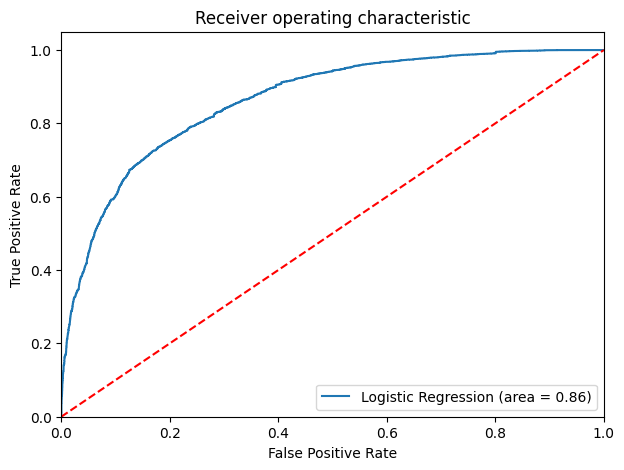

In [ ]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

###Optimal threshold using ROC-AUC curve

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3700522558708295


**Checking model performance with optimal roc-auc threshold**

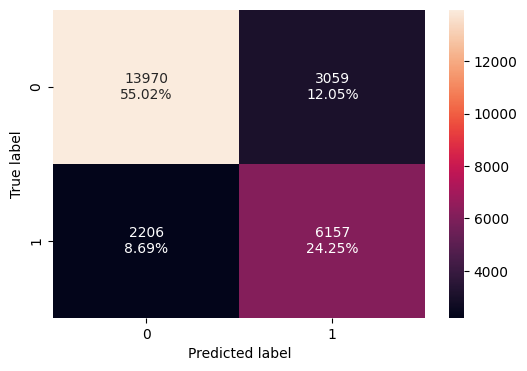

In [ ]:
confusion_matrix_statsmodels(lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc )

In [ ]:
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold= optimal_threshold_auc_roc)

log_reg_model_train_perf_threshold_auc_roc

Accuracy  Recall  Precision      F1
0   0.79265 0.73622    0.66808 0.70049

**Checking model performance on test set**

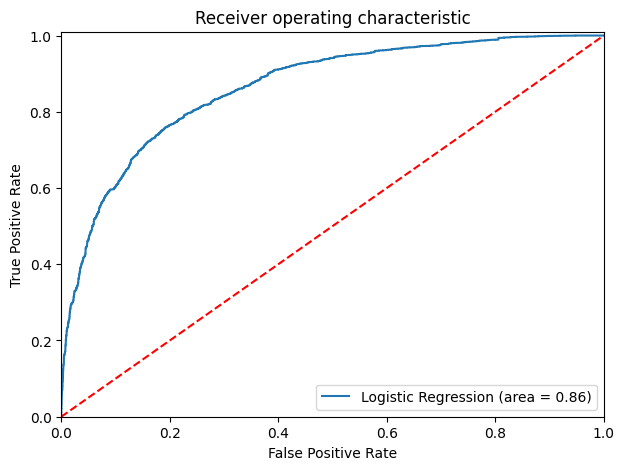

In [ ]:
#ROC curve on test set
logit_roc_auc_train = roc_auc_score(y_test, lg1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

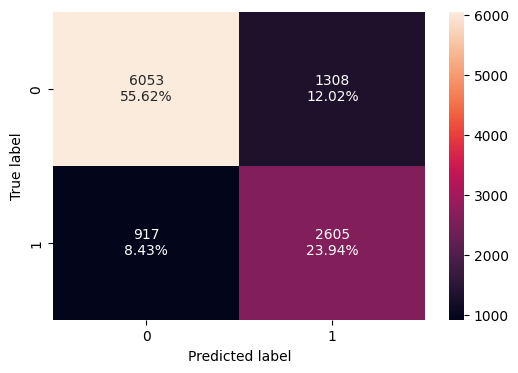

In [ ]:
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc )

In [ ]:
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold= optimal_threshold_auc_roc)

log_reg_model_test_perf_threshold_auc_roc

Accuracy  Recall  Precision      F1
0   0.79555 0.73964    0.66573 0.70074

At a threshold of 0.37, the F1 score of the model has increased to 0.7 and the model generalizes well on the test set

###Precision-Recall curve

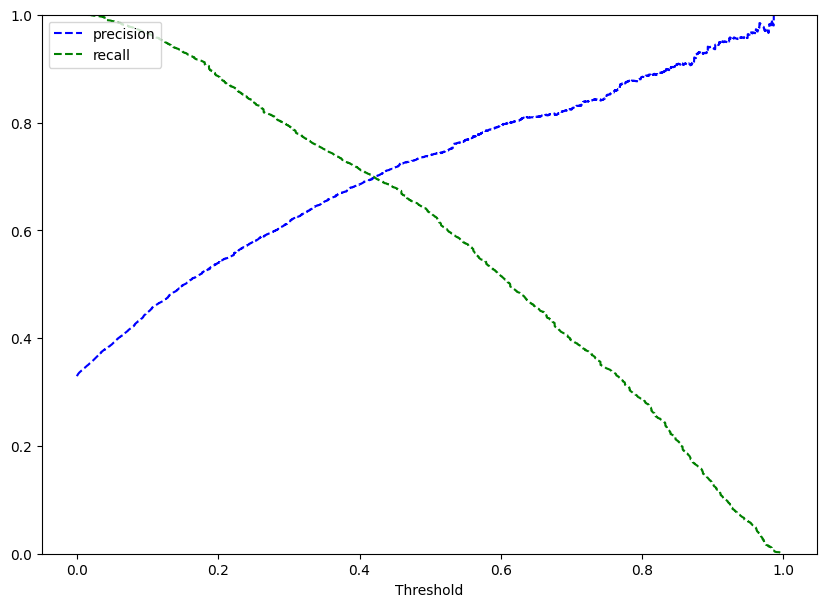

In [ ]:
#Plotting the precision-recall curve
y_scores = lg1.predict(X_train1)
prec, rec, thres = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, thres)
plt.show()

In [ ]:
#locating the optimal threshold
pre_recall_thres = pd.DataFrame({"Threshold" : thres,
                                 "Precision" : prec[:-1],
                                 "Recall" : rec[:-1]})

match_index = np.argwhere(prec[:-1] == rec[:-1])

match_index

array([[13164]])

In [ ]:
pre_recall_thres.loc[13164]

Threshold   0.42084
Precision   0.69879
Recall      0.69879
Name: 13164, dtype: float64

In [ ]:
optimal_threshold_pre_rec = 0.42084

**Checking model performance with precision-recall threshold**

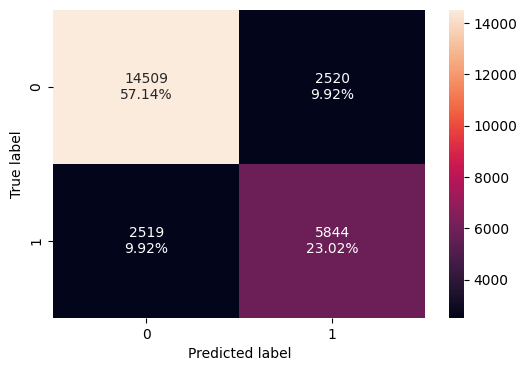

In [ ]:
confusion_matrix_statsmodels(lg1, X_train1, y_train, threshold=optimal_threshold_pre_rec )

In [ ]:
log_reg_model_train_perf_threshold_pre_rec = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold= optimal_threshold_pre_rec)

log_reg_model_train_perf_threshold_pre_rec

Accuracy  Recall  Precision      F1
0   0.80155 0.69879    0.69871 0.69875

Checking model perfomance on test set

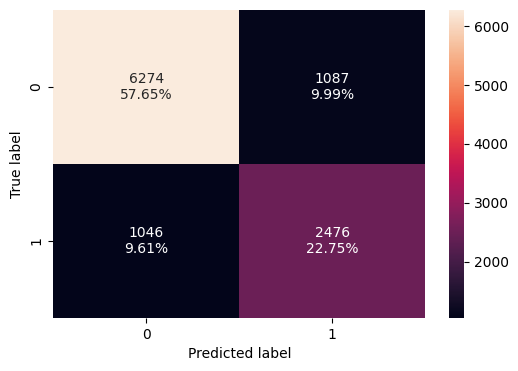

In [ ]:
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_pre_rec )

In [ ]:
log_reg_model_test_perf_threshold_pre_rec = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold= optimal_threshold_pre_rec)

log_reg_model_test_perf_threshold_pre_rec

Accuracy  Recall  Precision      F1
0   0.80401 0.70301    0.69492 0.69894

At a threshold of 0.42, the F1 score is at 0.698

##Model performance comparison

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_pre_rec.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression-default Threshold  \
Accuracy                                 0.80545   
Recall                                   0.63267   
Precision                                0.73907   
F1                                       0.68174   

           Logistic Regression-0.37 Threshold  \
Accuracy                              0.79265   
Recall                                0.73622   
Precision                             0.66808   
F1                                    0.70049   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.80155  
Recall                                0.69879  
Precision                             0.69871  
F1                                    0.69875

In [ ]:
# test set performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_pre_rec.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


Logistic Regression-default Threshold  \
Accuracy                                 0.80465   
Recall                                   0.63089   
Precision                                0.72900   
F1                                       0.67641   

           Logistic Regression-0.37 Threshold  \
Accuracy                              0.79555   
Recall                                0.73964   
Precision                             0.66573   
F1                                    0.70074   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.80401  
Recall                                0.70301  
Precision                             0.69492  
F1                                    0.69894

All the models are performing well with the train and test data and there is no overfitting

The model with the 0.37 threshold is giving the best F1 score, hence it will be selected as the final model

## Building a Decision Tree model

###Data preparation for Modeling

In [ ]:
X = df.drop(["booking_status"], axis=1)
Y = df["booking_status"]

X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.30, random_state=1)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
booking_status
0   0.67064
1   0.32936
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
0   0.67638
1   0.32362
Name: proportion, dtype: float64


About 67% of observatiions belonged to class 0 (Not canceled) and 32% of observations belonged to class 1 (Canceled) and this has been preserved in the train and test sets

###Defining functions to calculate the metrics of the models

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
#function to plot confusion matrix
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

###Model building

####Default decision tree

In [ ]:
model0 = DecisionTreeClassifier(random_state = 1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

###Evaluating performance

**On training set**

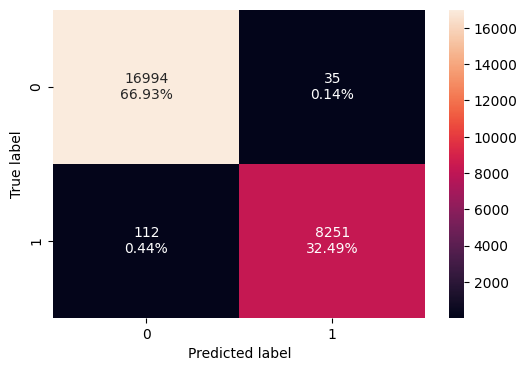

In [ ]:
confusion_matrix_sklearn(model0, X_train, y_train)

In [ ]:
dec_tree_perf_train_default = model_performance_classification_sklearn(model0, X_train, y_train)
dec_tree_perf_train_default

Accuracy  Recall  Precision      F1
0   0.99421 0.98661    0.99578 0.99117

**On test set**

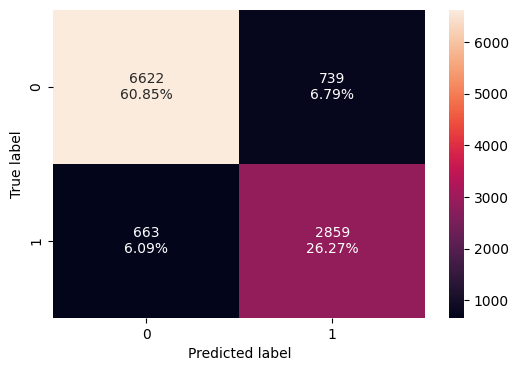

In [ ]:
confusion_matrix_sklearn(model0, X_test, y_test)

In [ ]:
dec_tree_perf_test_default = model_performance_classification_sklearn(model0, X_test, y_test)
dec_tree_perf_test_default

Accuracy  Recall  Precision      F1
0   0.87118 0.81175    0.79461 0.80309

Overfitting is present as expected

###Decision tree with class_weights hyperparameter

Class imbalance: Class 0 is higher in proportion in the dataset, setting the class_weight hyperparameter to balanced to help deal with possible bias

In [ ]:
model = DecisionTreeClassifier(random_state = 1, class_weight = "balanced")
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

###Evaluating model

**On training set**

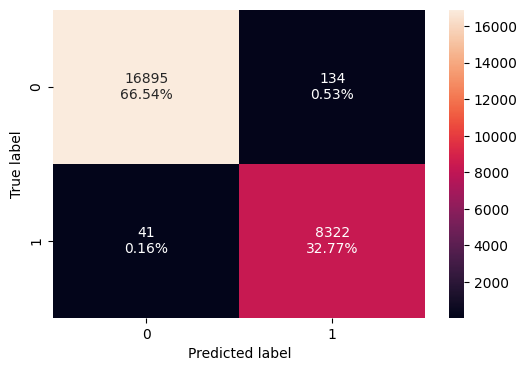

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

In [ ]:
dec_tree_perf_train_balanced = model_performance_classification_sklearn(model, X_train, y_train)
dec_tree_perf_train_balanced

Accuracy  Recall  Precision      F1
0   0.99311 0.99510    0.98415 0.98960

**On test set**

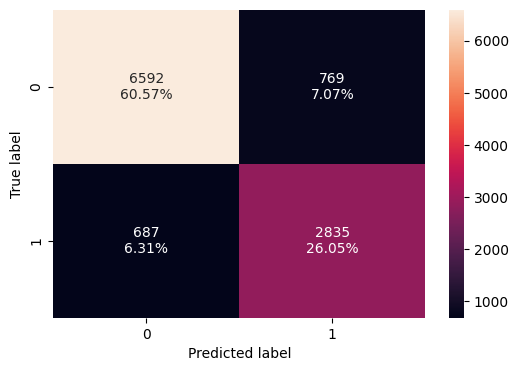

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test)

In [ ]:
dec_tree_perf_test_balanced = model_performance_classification_sklearn(model, X_test, y_test)
dec_tree_perf_test_balanced

Accuracy  Recall  Precision      F1
0   0.86621 0.80494    0.78663 0.79568

The model is overfitting on the training data

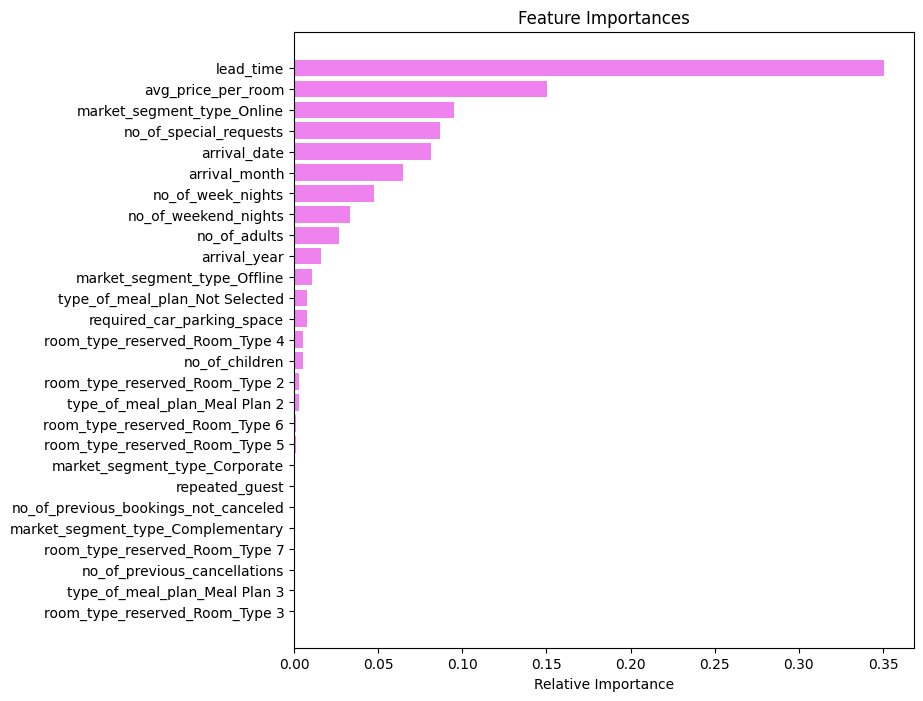

In [ ]:
#Checking important features
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In the default decision tree, lead time and average price per room are two most important features

## Pruning to reduce overfitting

###Pre-Prunning

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

###Model performance check

**On training set**

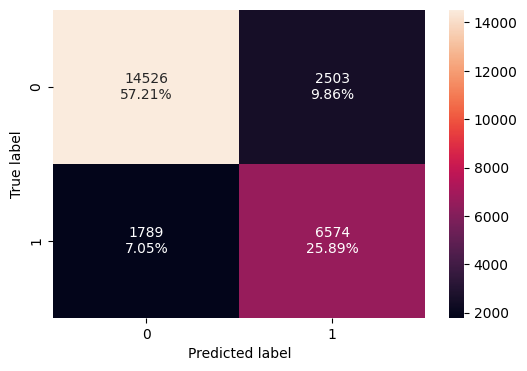

In [ ]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [ ]:
dec_tree_perf_train_pre = model_performance_classification_sklearn(estimator, X_train, y_train)
dec_tree_perf_train_pre

Accuracy  Recall  Precision      F1
0   0.83097 0.78608    0.72425 0.75390

**On test set**

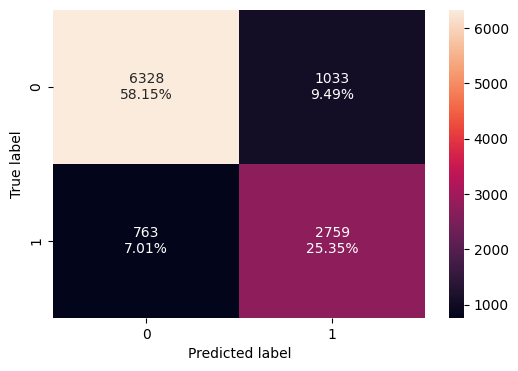

In [ ]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [ ]:
dec_tree_perf_test_pre = model_performance_classification_sklearn(estimator, X_test, y_test)
dec_tree_perf_test_pre

Accuracy  Recall  Precision      F1
0   0.83497 0.78336    0.72758 0.75444

This model performs better on the test set and the F1 scores on both the train and test sets are ~0.75

###Visualizing the tree

In [ ]:
feature_names = list(X_train.columns)
importances = estimator.feature_importances_
indices = np.argsort(importances)

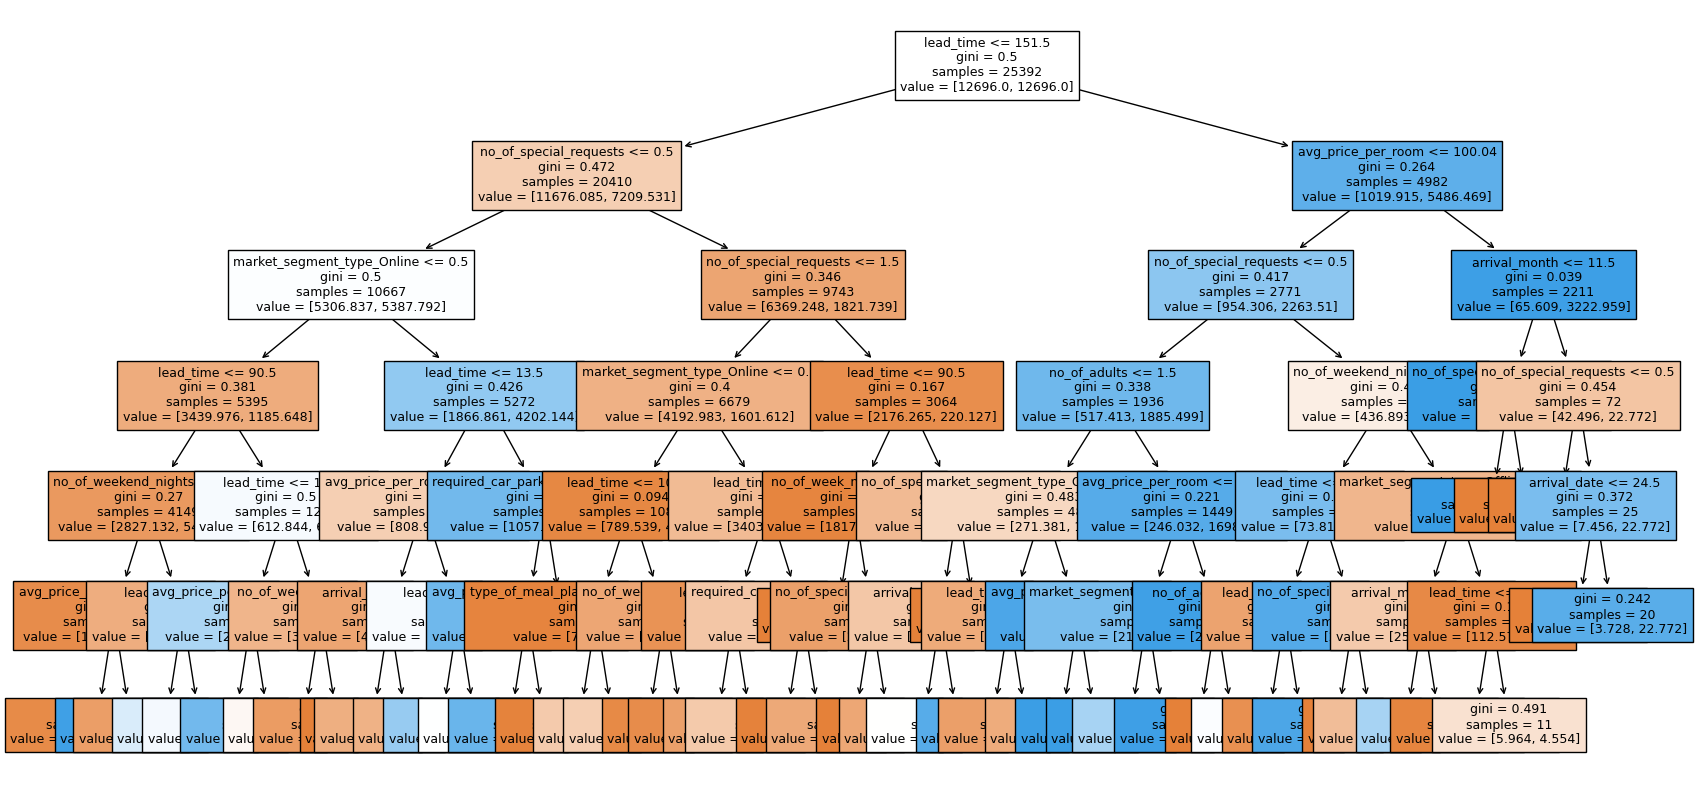

In [ ]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 133.59] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 24.29] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

Using the extracted decision rules, interpretations like below can be made:


If lead time is less than or equal to 151.5, number of special requests is less than or equal to 0.5, the booking does not belong to the online segment, lead time is less than or equal to 90.5, number of weekend night is less than or equal to 0,5, average price per room is less than or equal to 196.5, then the booking will most likely be canceled

###Features of importance

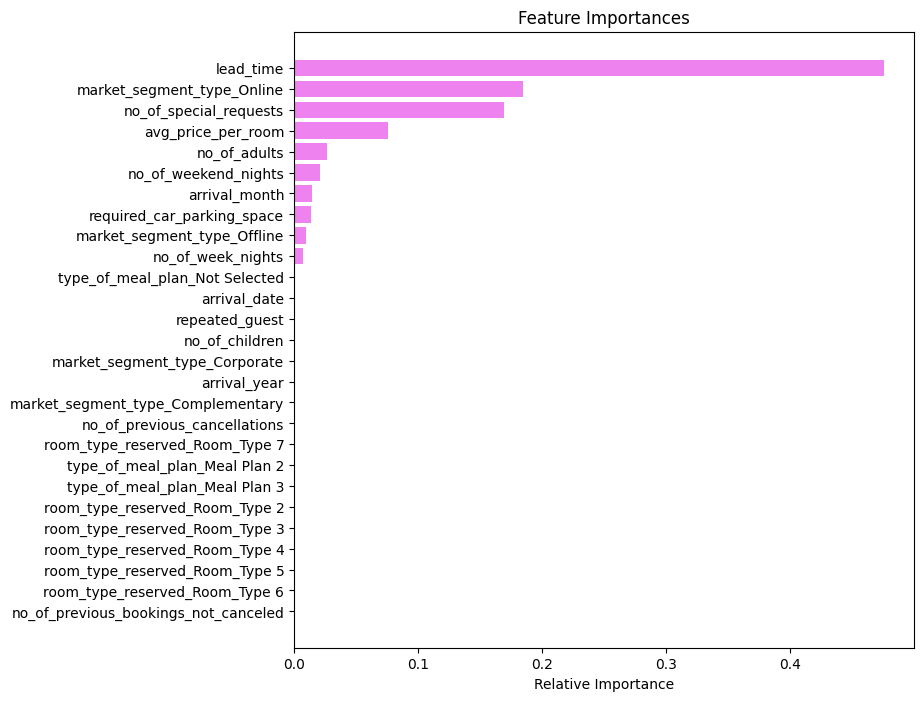

In [ ]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

The two most important features in the pre-pruned model are lead_time and market_segment_type_Online

###Post-Pruning

In [ ]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [ ]:
pd.DataFrame(path)

ccp_alphas  impurities
0        0.00000     0.00838
1        0.00000     0.00838
2        0.00000     0.00838
3        0.00000     0.00838
4        0.00000     0.00838
...          ...         ...
1839     0.00890     0.32806
1840     0.00980     0.33786
1841     0.01272     0.35058
1842     0.03412     0.41882
1843     0.08118     0.50000

[1844 rows x 2 columns]

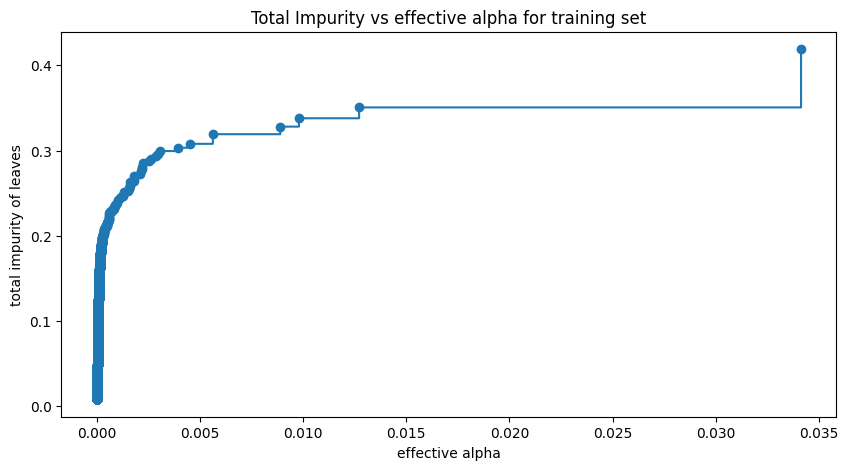

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

####Training using the effective alphas, except for the last value which leaves the tree with just the root node

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.0811791438913696


####Showing the changes in alpha as the number of nodes and tree depth increases

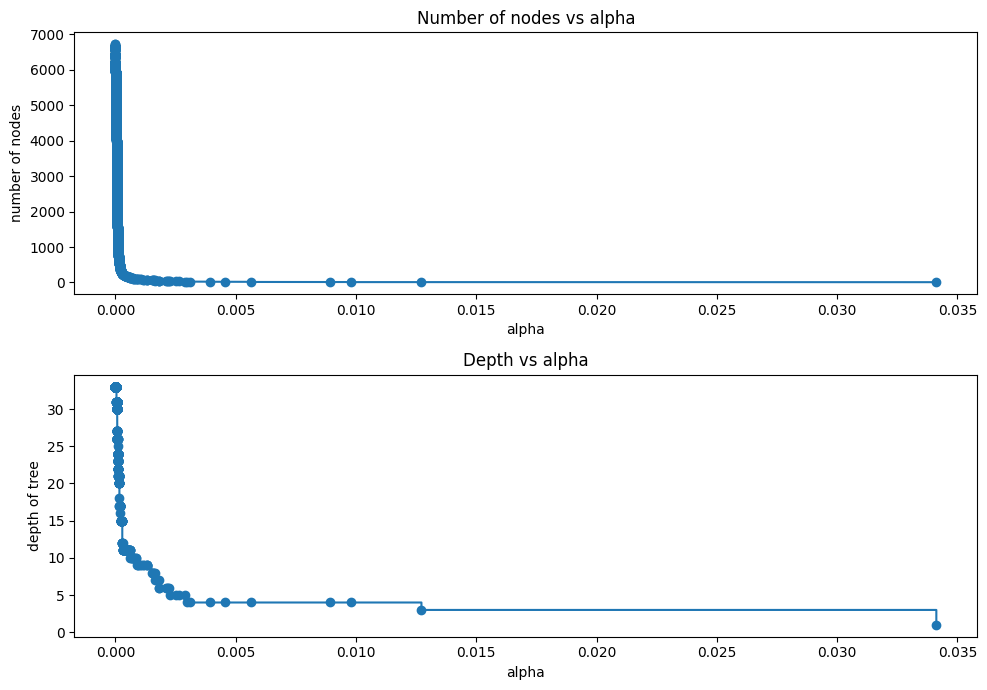

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

As alpha increases, number of nodes and tree depth decrease

###F1 score vs alpha for the training and testing sets

In [ ]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

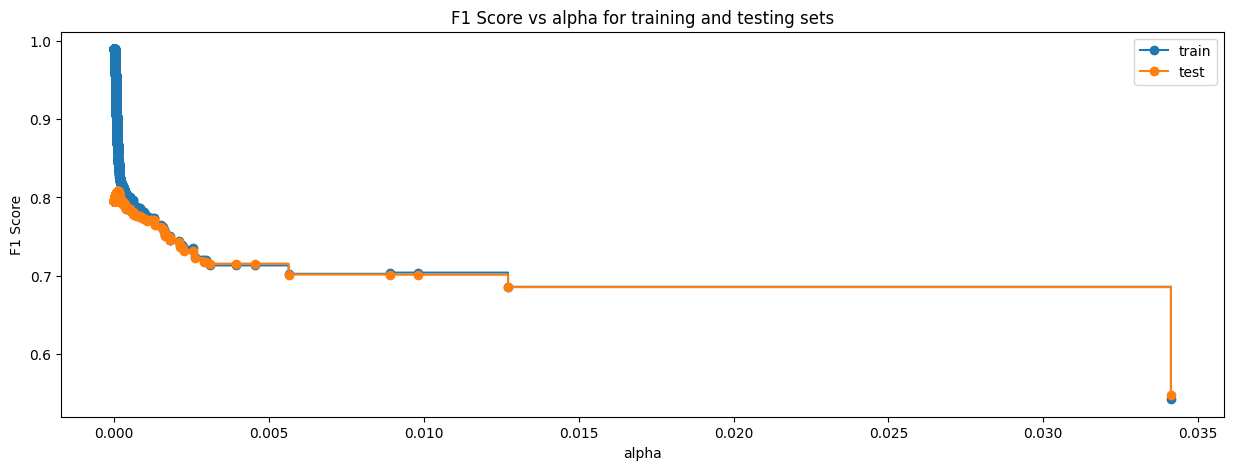

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
index_model_post = np.argmax(f1_test)
model_post = clfs[index_model_post]
print(model_post)

DecisionTreeClassifier(ccp_alpha=0.00012267633155167043,
                       class_weight='balanced', random_state=1)


###Model performance check

**On training set**

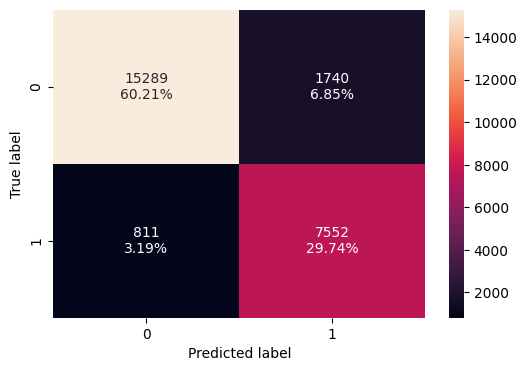

In [ ]:
confusion_matrix_sklearn(model_post, X_train, y_train)

In [ ]:
dec_tree_perf_train_post = model_performance_classification_sklearn(model_post, X_train, y_train)
dec_tree_perf_train_post

Accuracy  Recall  Precision      F1
0   0.89954 0.90303    0.81274 0.85551

**On testing set**

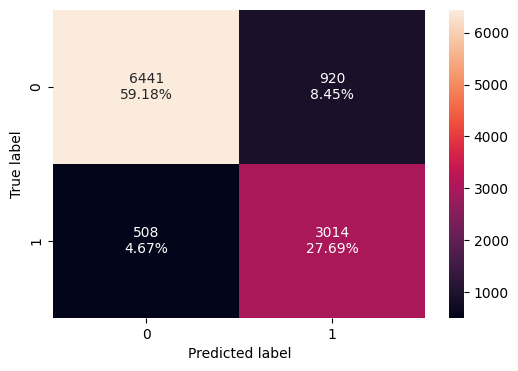

In [ ]:
confusion_matrix_sklearn(model_post, X_test, y_test)

In [ ]:
dec_tree_perf_test_post = model_performance_classification_sklearn(model_post, X_test, y_test)
dec_tree_perf_test_post

Accuracy  Recall  Precision      F1
0   0.86879 0.85576    0.76614 0.80848

 The post-pruned tree generalizes well on the test data and the f1 scores on the train and test are ~0.85 and 0.8 respectively

###Visualizing the post pruned tree

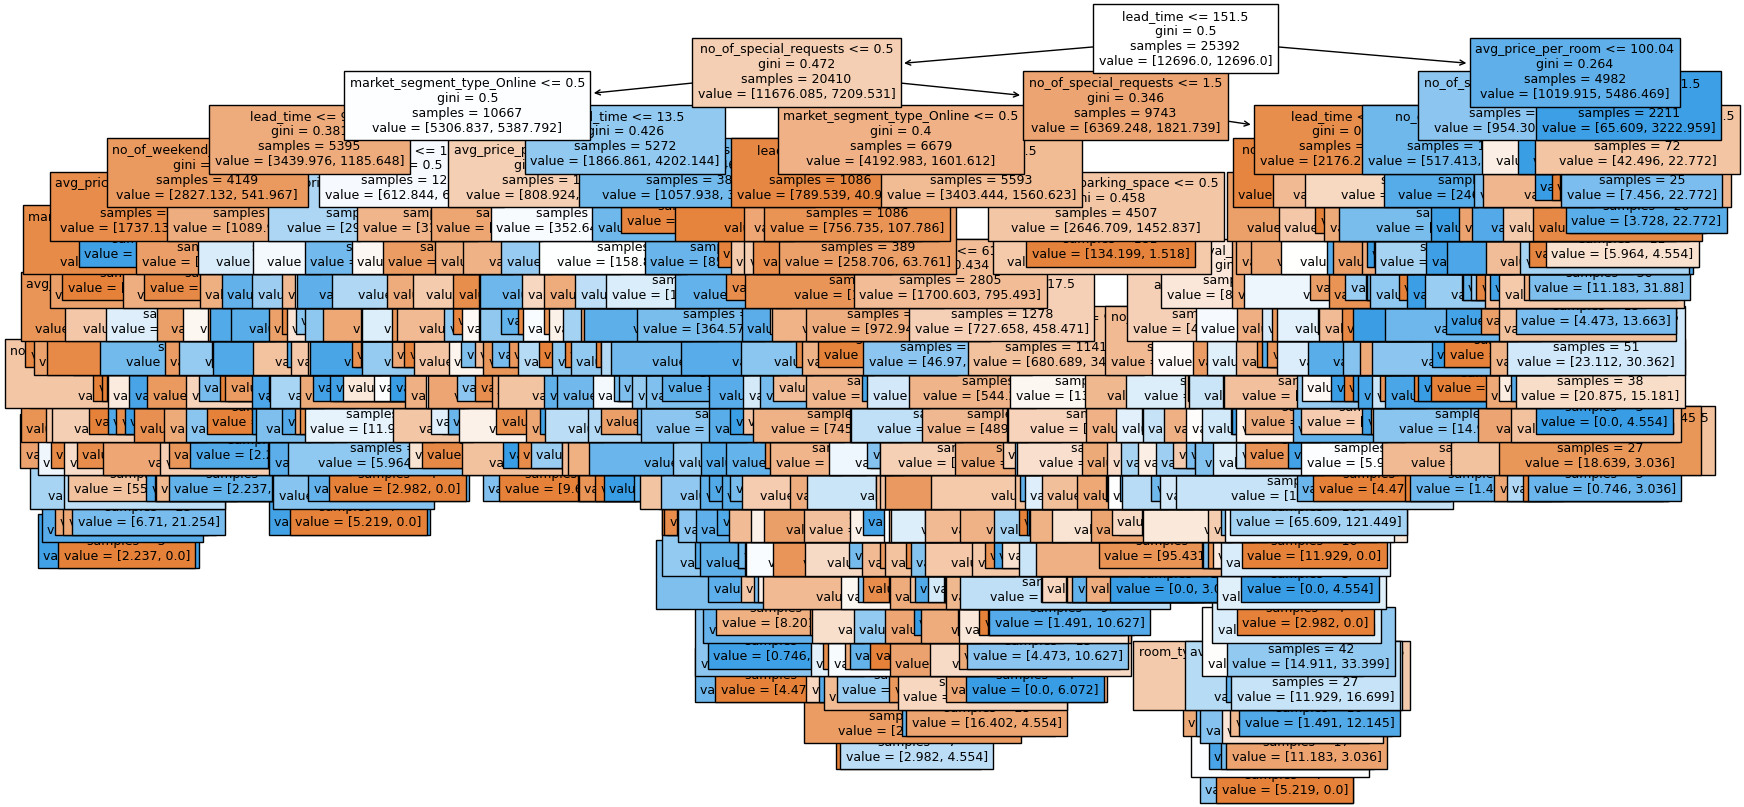

In [ ]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    model_post,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model_post, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

If lead time is less than or equal to 151.5, number of special requests is less than or equal to 0.5, the booking does not belong to the online market segment, lead time is less than or equal to 90.5, number of weekend night is less than or equal to 0,5, average price per room is less than or equal to 196.5, the booking does not belong to the offline market segment, lead time is less than or equal to 16.50, average price per room is less than or equal to 68,50 then the booking will likely be canceled

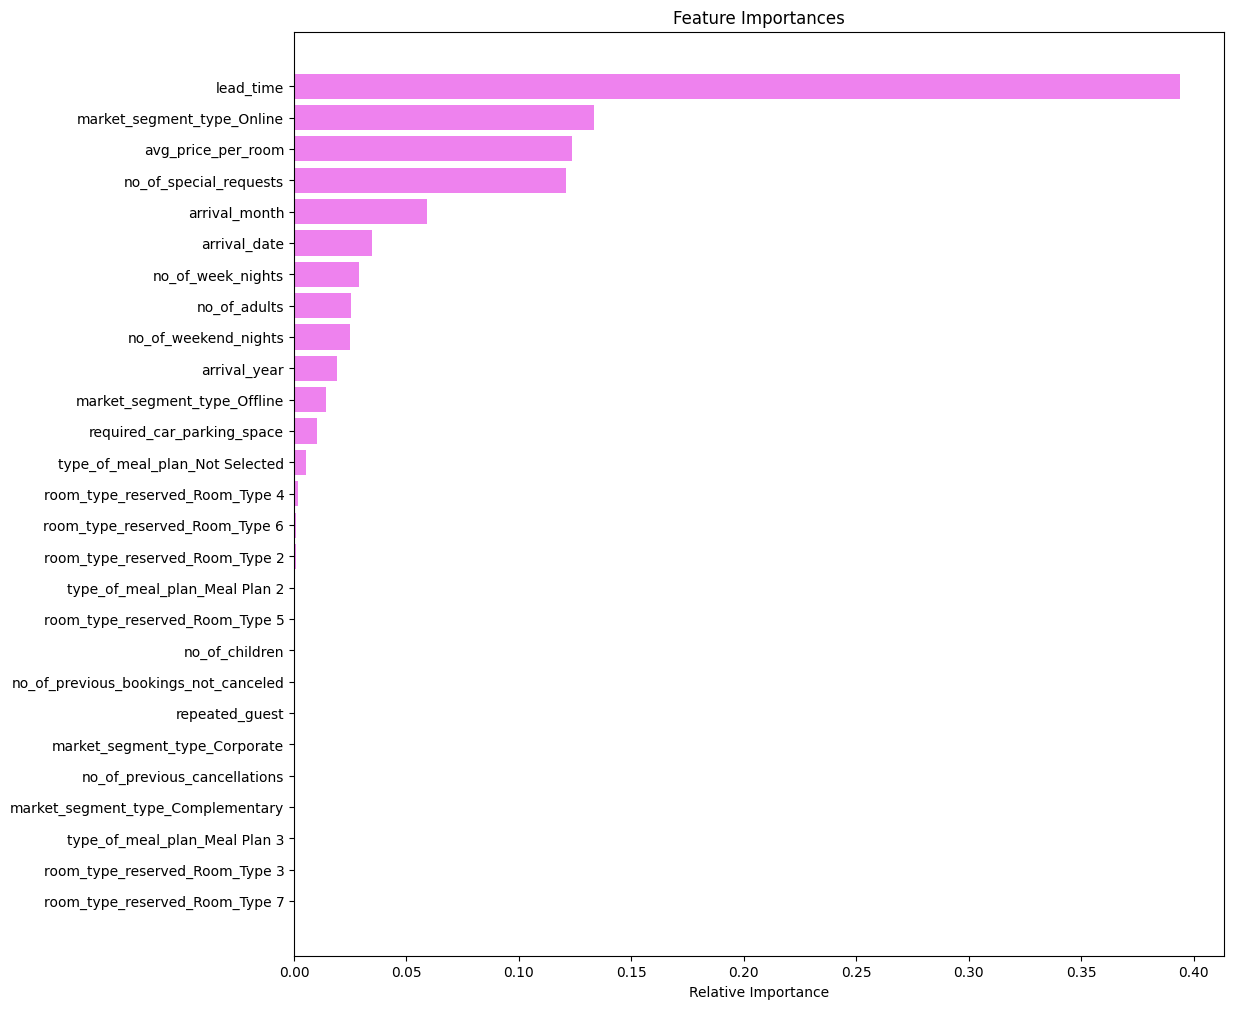

In [ ]:
importances = model_post.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

The most important features of the post pruned model are lead_time and market_segment_type_Online

## Model Performance Comparison and Conclusions

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dec_tree_perf_train_default.T,
        dec_tree_perf_train_balanced.T,
        dec_tree_perf_train_pre.T,
        dec_tree_perf_train_post.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree without class_weight  \
Accuracy                              0.99421   
Recall                                0.98661   
Precision                             0.99578   
F1                                    0.99117   

           Decision Tree with class_weight  Decision Tree (Pre-Pruning)  \
Accuracy                           0.99311                      0.83097   
Recall                             0.99510                      0.78608   
Precision                          0.98415                      0.72425   
F1                                 0.98960                      0.75390   

           Decision Tree (Post-Pruning)  
Accuracy                        0.89954  
Recall                          0.90303  
Precision                       0.81274  
F1                              0.85551

In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        dec_tree_perf_test_default.T,
        dec_tree_perf_test_balanced.T,
        dec_tree_perf_test_pre.T,
        dec_tree_perf_test_post.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Decision Tree without class_weight  \
Accuracy                              0.87118   
Recall                                0.81175   
Precision                             0.79461   
F1                                    0.80309   

           Decision Tree with class_weight  Decision Tree (Pre-Pruning)  \
Accuracy                           0.86621                      0.83497   
Recall                             0.80494                      0.78336   
Precision                          0.78663                      0.72758   
F1                                 0.79568                      0.75444   

           Decision Tree (Post-Pruning)  
Accuracy                        0.86879  
Recall                          0.85576  
Precision                       0.76614  
F1                              0.80848

The post pruned model is the model with the highest F1 score, which is the metric of importance. Hence, the post pruned will be chosen as the best model

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

The decision tree model can correctly identify 80.8% of the canceled bookings. The two most important variables in predicting a booking status are lead_time and market_segment_type_Online,

From the decision tree, it has been observed that if lead time is less than or equal to 151.5, number of special requests is less than or equal to 0.5, the booking does not belong to the online market segment, lead time is less than or equal to 90.5, number of weekend night is less than or equal to 0,5, average price per room is less than or equal to 196.5, the booking does not belong to the offline market segment, lead time is less than or equal to 16.50, average price per room is less than or equal to 68,50 then the booking will likely be canceled

The logistic regression model choses as an f1 score of 70%
Coefficients of no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, lead_time, no_of_previous_cancellations, avg_price_per_room, some meal plans are positive. Increase in these variables will increase the chance of a booking being canceled

Coefficients of required_car_parking_space, repeated_guest, no_of_special_requests, some reserved room types are negative. Increase in these, will decrease the chance of a booking being canceled.


**Comparing both models**:

The decision tree model has a higher F1 score which is the metric of importance, hence it should be chosen as the final model.

**Recommendations:**

The hotel can offer guests the opportunity to cancel bookings up until a certain amount of days (a day or two for example) before they check in. Once this date has passed, the hotel can then charge the guests a cancellation fee which could be a set free, a percentage of the booking fee, or an equivalent to one night's room rate.

During peak periods (August, September and October), the hotel can have stricter cancellation policies to minimise losses.

Repeated guests are less likely to cancel bookings, the hotel can start a loyalty program with benefits that would encourage guests to become regular customers.

An effective referral program would encourage more bookings at the hotel. These bookings would less likely be canceled as people tend to trust referrals from family and friends

64% of the bookings in the dataset are from the Online Market segment, the hotel can enhance their online presence, do more analysis of their customer demographics and then do more targeted marketing.